In [1]:
import pandas as pd
path = 'Healthcare Providers.csv'  
data = pd.read_csv(path)

In [2]:
print("First few rows of the dataset:")
display(data.head())

First few rows of the dataset:


,index,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,8774979,1891106191,UPADHYAYULA,SATYASREE,NaN,M.D.,F,I,1402 S GRAND BLVD,FDT 14TH FLOOR,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.58777778,305.21111111,157.26222222,160.90888889
1,3354385,1346202256,JONES,WENDY,P,M.D.,F,I,2950 VILLAGE DR,NaN,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.8,118.83,135.31525714
2,3001884,1306820956,DUROCHER,RICHARD,W,DPM,M,I,20 WASHINGTON AVE,STE 212,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155,64.4396875,60.5959375
3,7594822,1770523540,FULLARD,JASPER,NaN,MD,M,I,5746 N BROADWAY ST,NaN,...,81002,"Urinalysis, manual test",N,20,18,20,3.5,5,3.43,3.43
4,746159,1073627758,PERROTTI,ANTHONY,E,DO,M,I,875 MILITARY TRL,SUITE 200,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40,19.539393939,19.057575758


In [3]:
columns_to_drop = ['index', 'Street Address 2 of the Provider', 'Middle Initial of the Provider', 'First Name of the Provider']
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

In [4]:
categorical_columns = ['Last Name/Organization Name of the Provider', 'Credentials of the Provider', 'Gender of the Provider']
for column in categorical_columns:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column] = data_cleaned[column].fillna(mode_value)

In [5]:
numerical_columns = ['Zip Code of the Provider']
for column in numerical_columns:
    median_value = data_cleaned[column].median()
    data_cleaned[column] = data_cleaned[column].fillna(median_value)

In [6]:
columns_to_round = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
                    'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

In [7]:
for column in columns_to_round:
    data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='coerce').round(2)

In [8]:
data_cleaned['Gender of the Provider'] = data_cleaned['Gender of the Provider'].map({'F': 1, 'M': 0})
data_cleaned['Entity Type of the Provider'] = data_cleaned['Entity Type of the Provider'].map({'I': 1, 'O': 0})

In [9]:
data_cleaned = data_cleaned.fillna(0)

In [10]:
from IPython.display import display
display(data_cleaned.head())

,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,UPADHYAYULA,M.D.,1,1,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,MO,US,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.59,305.21,157.26,160.91
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.80,118.83,135.32
2,1306820956,DUROCHER,DPM,0,1,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155.00,64.44,60.60
3,1770523540,FULLARD,MD,0,1,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,81002,"Urinalysis, manual test",N,20,18,20,3.50,5.00,3.43,3.43
4,1073627758,PERROTTI,DO,0,1,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40.00,19.54,19.06


In [11]:
print(data_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   National Provider Identifier                              100000 non-null  int64  
 1   Last Name/Organization Name of the Provider               100000 non-null  object 
 2   Credentials of the Provider                               100000 non-null  object 
 3   Gender of the Provider                                    100000 non-null  int64  
 4   Entity Type of the Provider                               100000 non-null  int64  
 5   Street Address 1 of the Provider                          100000 non-null  object 
 6   City of the Provider                                      100000 non-null  object 
 7   Zip Code of the Provider                                  100000 non-null  float64
 8   State

In [12]:
output_file_path = 'cleaned_healthcare.csv'
data_cleaned.to_csv(output_file_path, index=False)

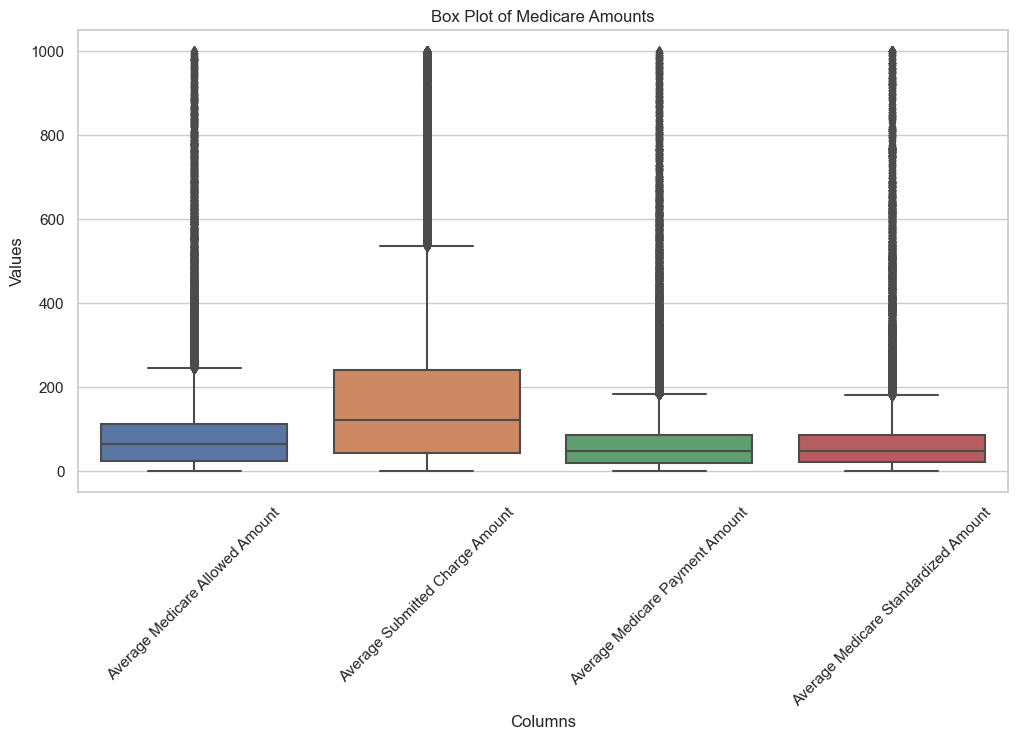

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
columns_to_plot = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
                   'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned[columns_to_plot])
plt.title('Box Plot of Medicare Amounts')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()


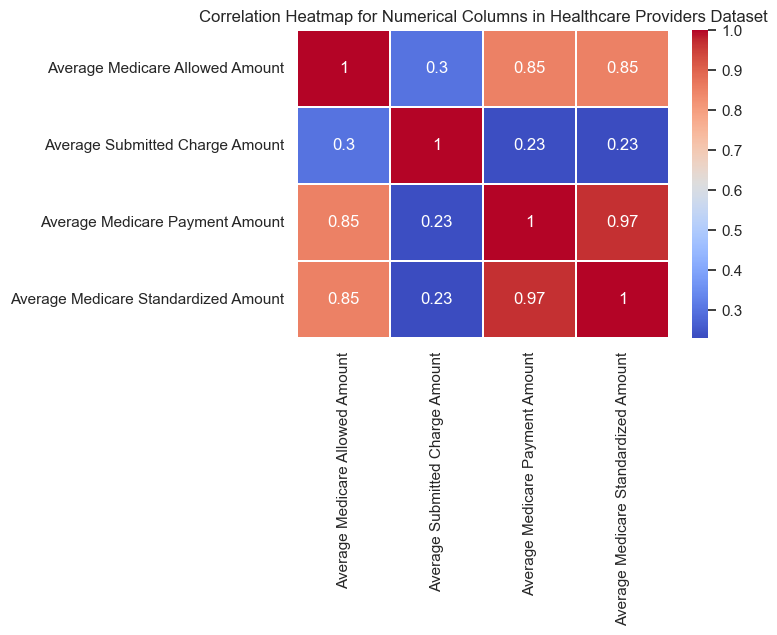

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = 'cleaned_healthcare.csv'
data_cleaned = pd.read_csv(path)

numerical_columns = ['Average Medicare Allowed Amount', 'Average Submitted Charge Amount', 
                     'Average Medicare Payment Amount', 'Average Medicare Standardized Amount']

# the correlation matrix
correlation_matrix = data_cleaned[numerical_columns].corr()
plt.figure(figsize=(6, 4))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap for Numerical Columns in Healthcare Providers Dataset')
plt.show()

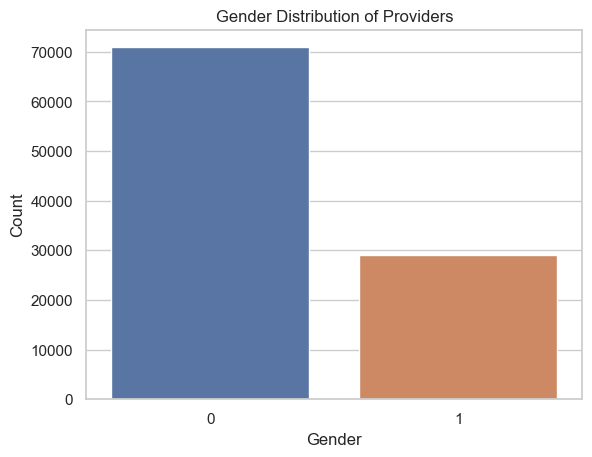

In [15]:
gender_counts = data_cleaned['Gender of the Provider'].value_counts()

import seaborn as sns
sns.barplot(x=gender_counts.index, y=gender_counts.values)

plt.title('Gender Distribution of Providers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

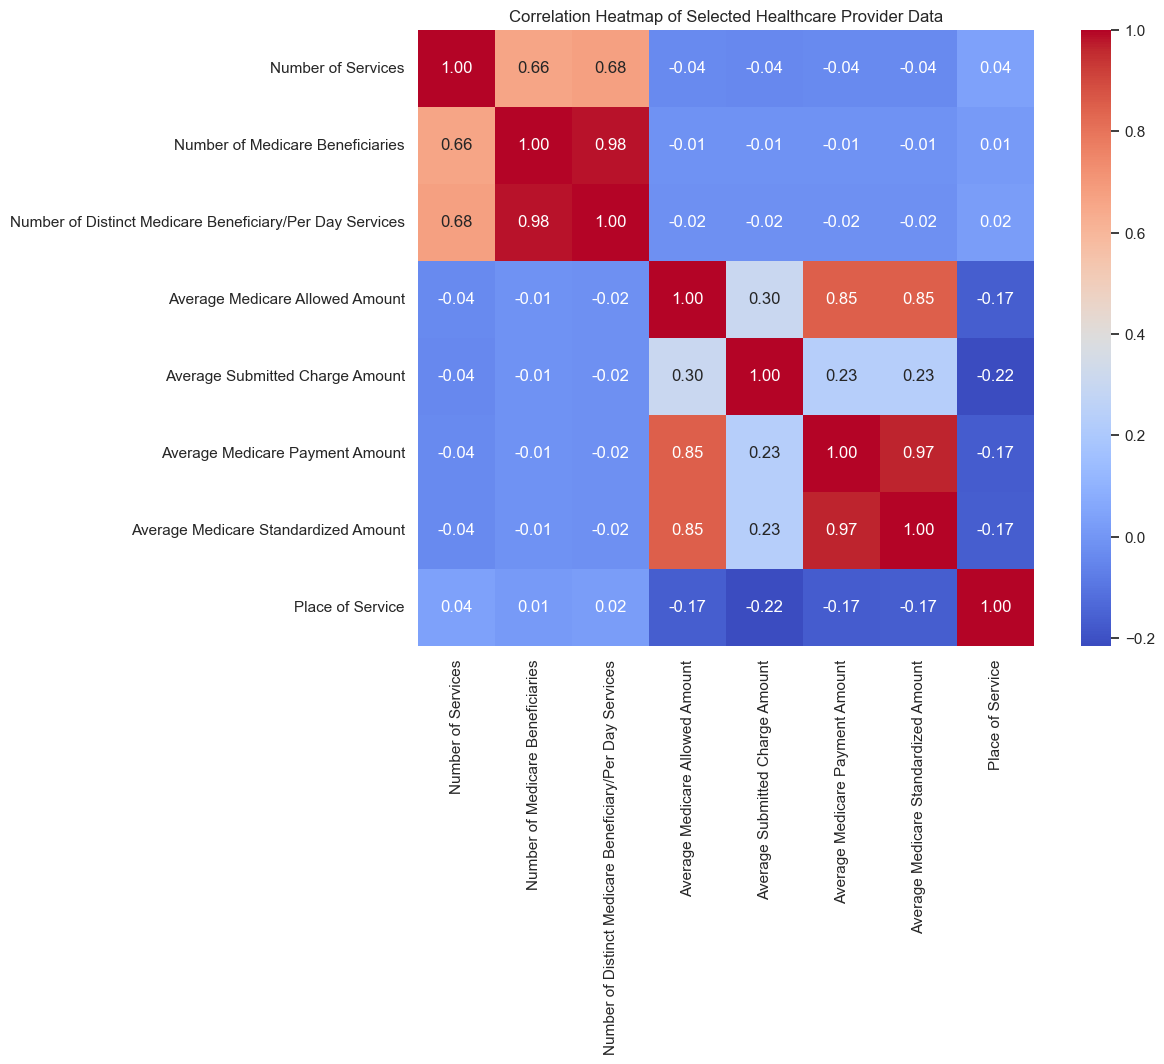

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# List of numerical columns, now including 'Credentials of the Provider' and 'Gender of the Provider'
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
]

# Define a function to clean and convert numeric columns
def clean_numeric_column(column):
    return pd.to_numeric(column.str.replace(',', '').str.strip(), errors='coerce')

for column in numerical_columns[:-2]:  # Exclude the last two (encoded) from this step
    data_cleaned[column] = clean_numeric_column(data_cleaned[column].astype(str))
    
# Encoding 'Gender of the Provider' to M/F -> 1/0 and 'Entity Type of the Provider' to I/O -> 1/0
label_encoder = LabelEncoder()
data_cleaned['Gender of the Provider'] = label_encoder.fit_transform(data_cleaned['Gender of the Provider'])
data_cleaned['Entity Type of the Provider'] = label_encoder.fit_transform(data_cleaned['Entity Type of the Provider'])

# Optional: Encoding 'Place of Service' to F/O -> 1/0 (if needed for the analysis)
data_cleaned['Place of Service'] = label_encoder.fit_transform(data_cleaned['Place of Service'])

# Preparing the heatmap data with the updated numerical columns
heatmap_data = data_cleaned[numerical_columns + ['Place of Service']]
correlation_matrix = heatmap_data.corr()

# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Selected Healthcare Provider Data')
plt.show()


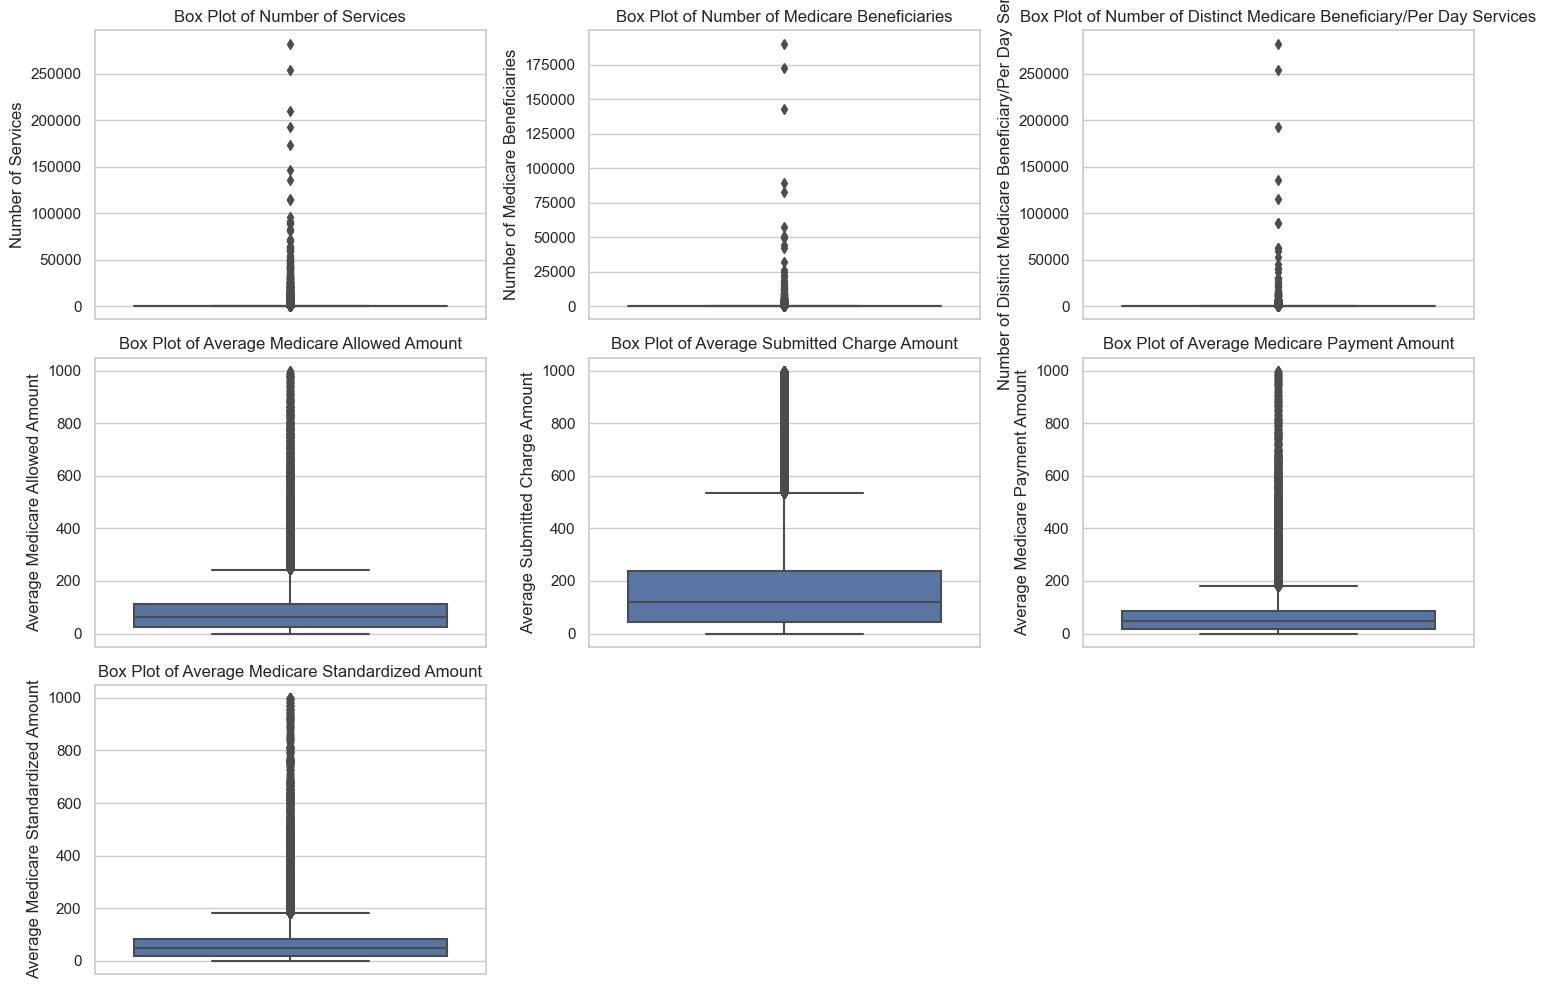

In [17]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1) 
    sns.boxplot(y=data_cleaned[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

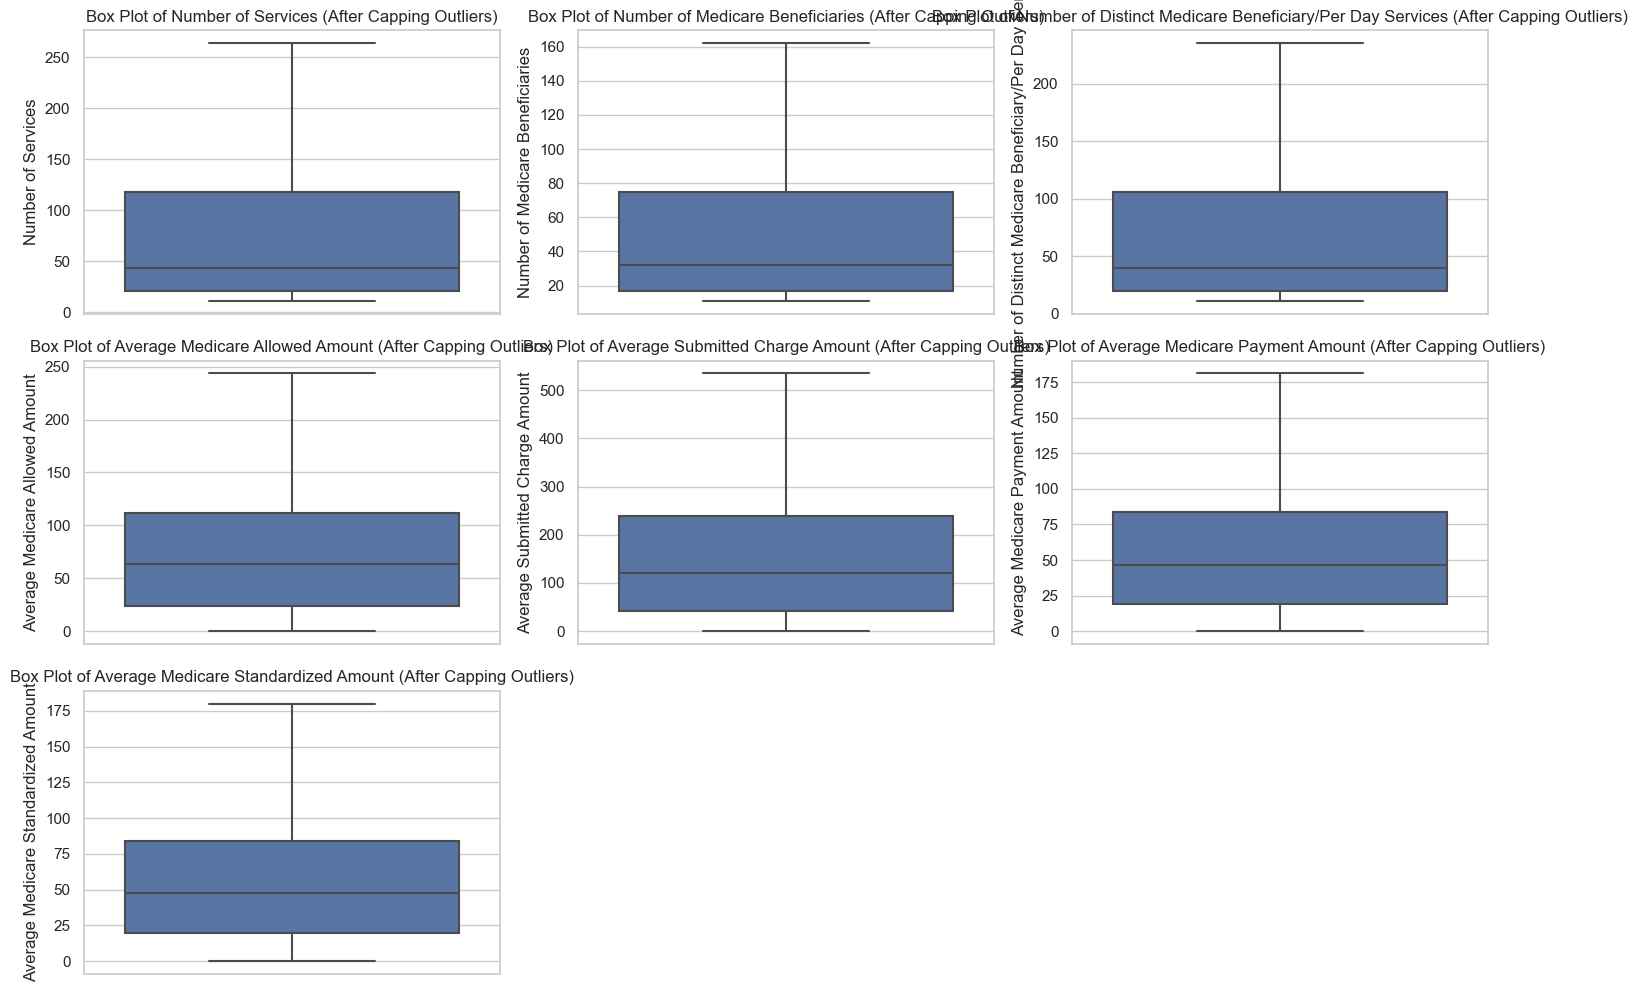

In [18]:
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
for column in numerical_columns:
    if data_cleaned[column].dtype == 'object':
        data_cleaned[column] = pd.to_numeric(data_cleaned[column].str.replace(',', '').str.strip(), errors='coerce')
    else:
        data_cleaned[column] = data_cleaned[column].astype(float)

def cap_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

data_cleaned_capped = cap_outliers_iqr(data_cleaned.copy(), numerical_columns)

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_cleaned_capped[column])
    plt.title(f'Box Plot of {column} (After Capping Outliers)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


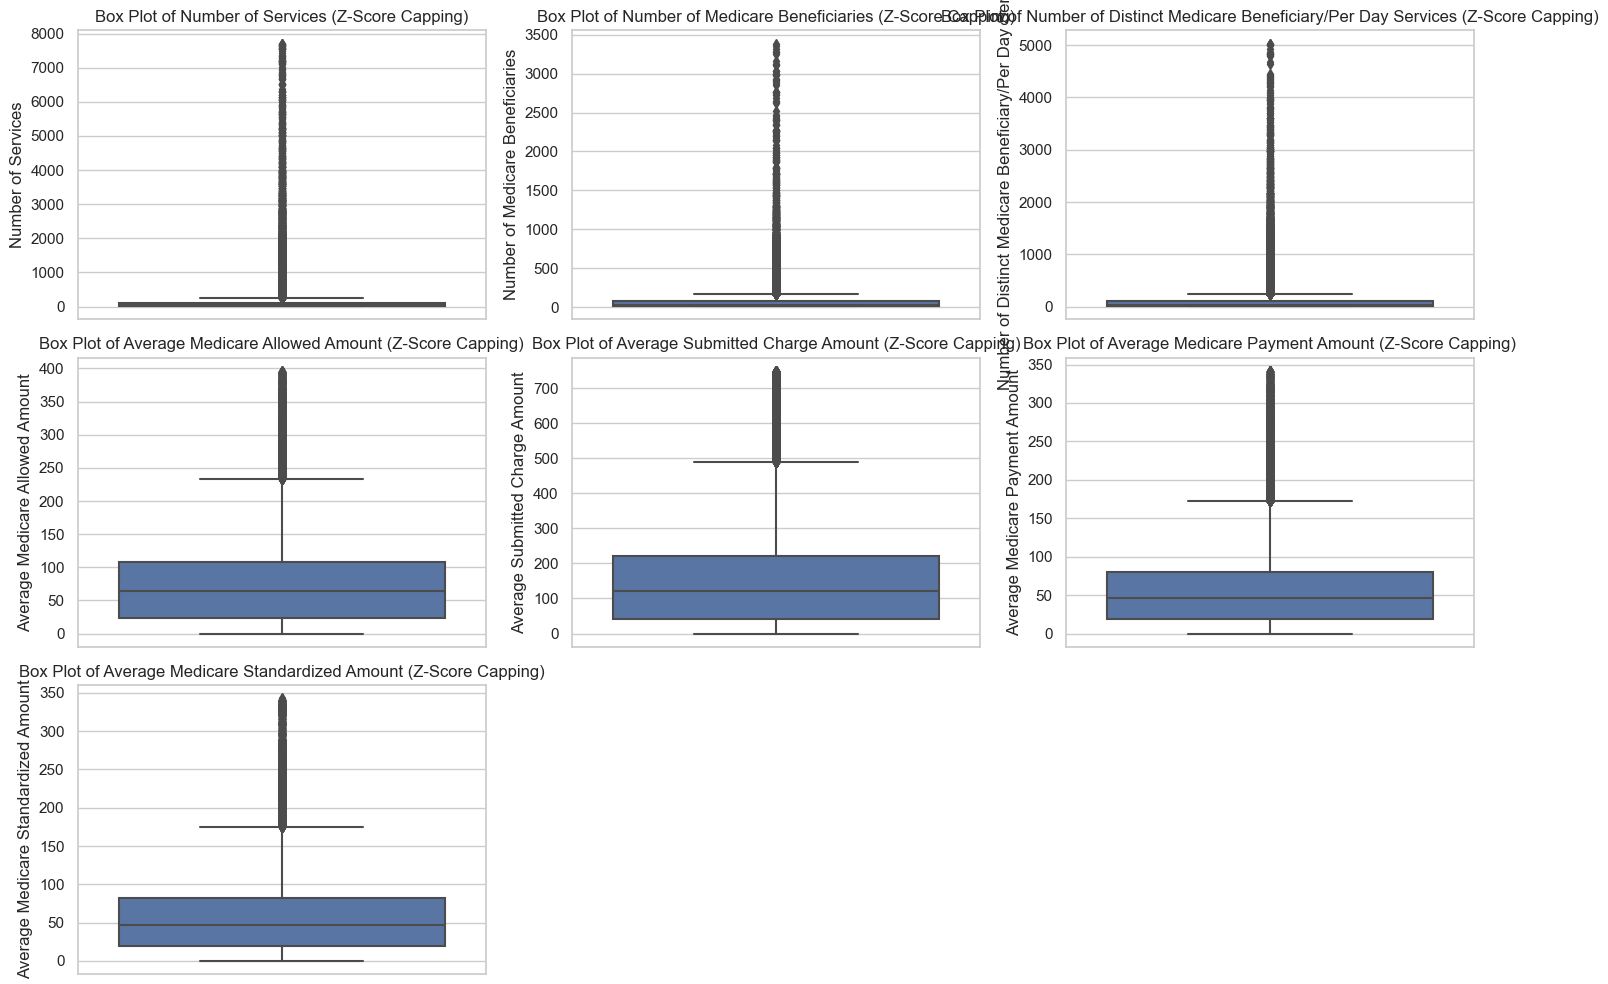

In [19]:
import numpy as np
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
for column in numerical_columns:
    if data_cleaned[column].dtype == 'object':
        data_cleaned[column] = pd.to_numeric(data_cleaned[column].str.replace(',', '').str.strip(), errors='coerce')
    else:
        data_cleaned[column] = data_cleaned[column].astype(float)

# Cap outliers using Z-score method
def cap_outliers_z_score(df, columns, threshold=3):
    for column in columns:
        z_scores = np.abs(stats.zscore(df[column].dropna())) 
        mean = df[column].mean()  # Calculate mean
        std_dev = df[column].std()  # Calculate standard deviation
        
        # Cap outliers to the mean or within 3 standard deviations
        df[column] = np.where(z_scores > threshold, mean, df[column])
        
    return df

# Cap outliers using Z-score
data_cleaned_z_score_capped = cap_outliers_z_score(data_cleaned.copy(), numerical_columns)

# Display box plots for Z-score capping
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data_cleaned_z_score_capped[column])
    plt.title(f'Box Plot of {column} (Z-Score Capping)')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [20]:
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
for column in numerical_columns:
    if data_cleaned[column].dtype == 'object':
        data_cleaned[column] = pd.to_numeric(data_cleaned[column].str.replace(',', '').str.strip(), errors='coerce')
    else:
        data_cleaned[column] = data_cleaned[column].astype(float)

# Function to detect and calculate outliers using IQR method
def calculate_iqr_outliers(df, columns):
    outlier_info = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total = df[column].notnull().sum()  # Count of non-null values
        outlier_info[column] = (outliers / total) * 100  # Percentage of outliers
    return outlier_info

# Function to detect and calculate outliers using Z-score method
def calculate_z_score_outliers(df, columns, threshold=3):
    outlier_info = {}
    for column in columns:
        z_scores = np.abs(stats.zscore(df[column].dropna()))  # Calculate Z-scores, ignoring NaNs
        outliers = (z_scores > threshold).sum()
        total = df[column].notnull().sum()  # Count of non-null values
        outlier_info[column] = (outliers / total) * 100  # Percentage of outliers
    return outlier_info

# Calculate percentage of outliers using IQR
iqr_outliers_percentage = calculate_iqr_outliers(data_cleaned.copy(), numerical_columns)

# Calculate percentage of outliers using Z-score
z_score_outliers_percentage = calculate_z_score_outliers(data_cleaned.copy(), numerical_columns)
comparison_df = pd.DataFrame({
    'IQR Outlier Percentage': iqr_outliers_percentage,
    'Z-Score Outlier Percentage': z_score_outliers_percentage
})

print("Comparison of Outlier Percentages:")
display(comparison_df)

plt.tight_layout()
plt.show()

Comparison of Outlier Percentages:


,IQR Outlier Percentage,Z-Score Outlier Percentage
Number of Services,12.316,0.337
Number of Medicare Beneficiaries,10.473,0.096
Number of Distinct Medicare Beneficiary/Per Day Services,11.895,0.099
Average Medicare Allowed Amount,4.458,1.992
Average Submitted Charge Amount,6.484,2.677
Average Medicare Payment Amount,5.789,1.932
Average Medicare Standardized Amount,5.708,1.874


<Figure size 640x480 with 0 Axes>

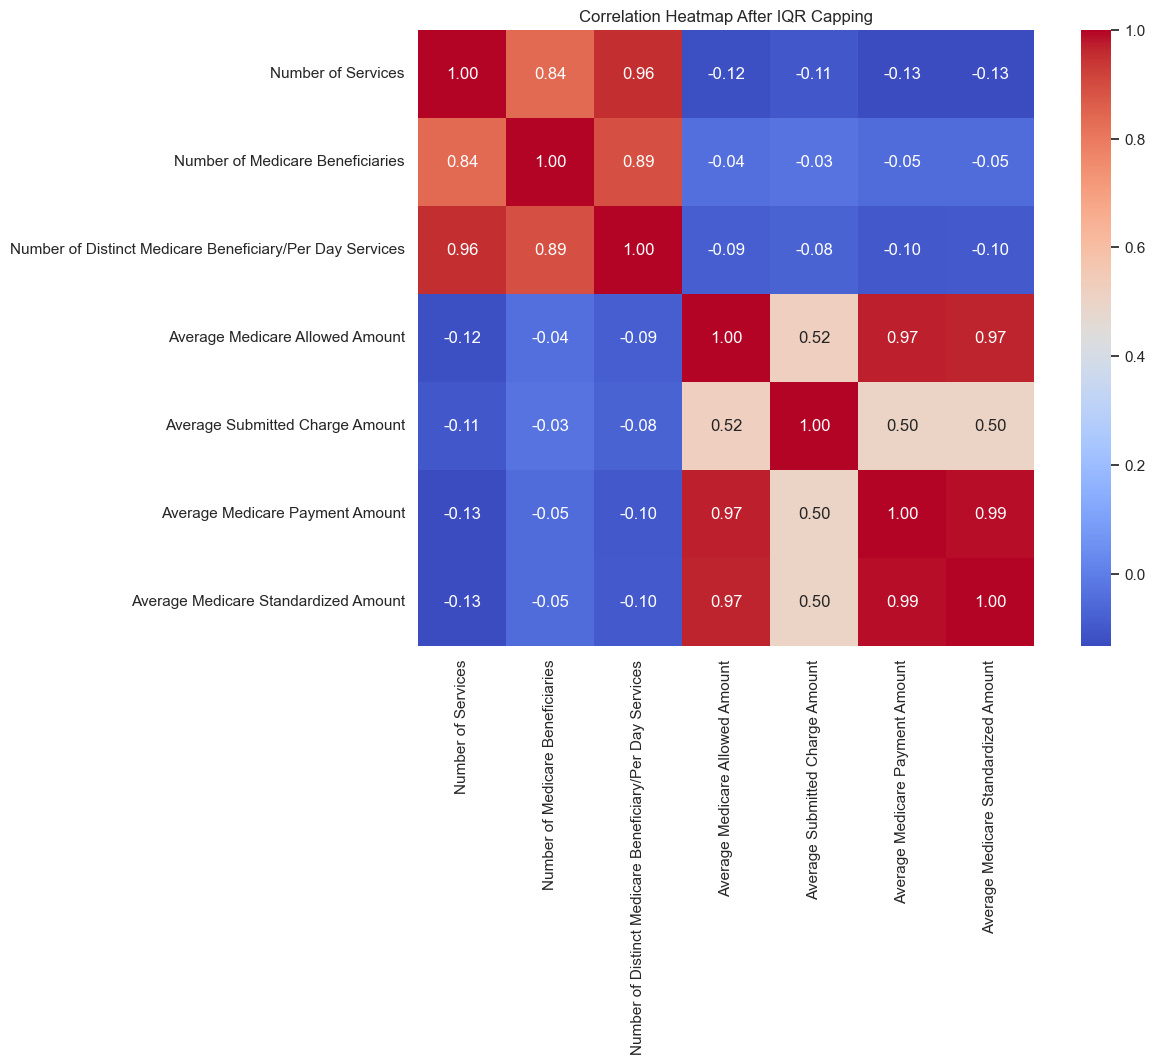

In [21]:
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
def clean_numeric_column(column):
    return pd.to_numeric(column.str.replace(',', '').str.strip(), errors='coerce')

for column in numerical_columns:
    data_cleaned[column] = clean_numeric_column(data_cleaned[column].astype(str))

# Cap outliers using IQR method
Q1 = data_cleaned[numerical_columns].quantile(0.25)
Q3 = data_cleaned[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_iqr_capped = data_cleaned.copy()

# Cap values beyond the IQR thresholds
for column in numerical_columns:
    data_iqr_capped[column] = np.where(data_iqr_capped[column] < lower_bound[column], 
                                        lower_bound[column], 
                                        np.where(data_iqr_capped[column] > upper_bound[column], 
                                                 upper_bound[column], 
                                                 data_iqr_capped[column]))

# Calculate the correlation matrix after IQR capping
correlation_matrix_iqr = data_iqr_capped[numerical_columns].corr()

# Generate the heatmap for IQR
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_iqr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap After IQR Capping')
plt.show()


In [22]:
from sklearn.preprocessing import StandardScaler
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Function to convert columns to numeric, removing non-numeric characters
def clean_numeric_column(column):
    return pd.to_numeric(column.str.replace(',', '').str.strip(), errors='coerce')

# Clean the specified numerical columns
for column in numerical_columns:
    data_cleaned[column] = clean_numeric_column(data_cleaned[column].astype(str))

# Display the original summary statistics before standardization
print("Original Data Statistics Before Standardization:")
display(data_cleaned[numerical_columns].describe())

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization only on numerical columns
data_standardized = data_cleaned.copy()
data_standardized[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Display the statistics after standardization
print("\nStandardized Data Statistics:")
display(data_standardized[numerical_columns].describe())


Original Data Statistics Before Standardization:


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,239.671424,89.809310,142.115680,86.803827,177.794123,68.483106,69.047258
std,2493.187089,1109.616902,1640.227228,103.288414,190.615421,91.085424,91.356371
min,11.000000,11.000000,11.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,17.000000,20.000000,23.750000,42.410000,19.010000,19.720000
50%,43.000000,32.000000,40.000000,63.500000,120.000000,46.500000,47.430000
75%,118.000000,75.000000,106.000000,111.750000,239.500000,83.960000,83.912500
max,282739.000000,190306.000000,282737.000000,999.850000,999.740000,998.620000,998.780000



Standardized Data Statistics:


,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-2.439826e-17,2.913225e-18,2.415845e-18,2.280842e-17,1.619682e-16,-1.170264e-16,-5.428547e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-9.171898e-02,-7.102425e-02,-7.993791e-02,-8.404066e-01,-9.327420e-01,-7.518596e-01,-7.558050e-01
25%,-8.770803e-02,-6.561695e-02,-7.445084e-02,-6.104668e-01,-7.102510e-01,-5.431534e-01,-5.399460e-01
50%,-7.888393e-02,-5.209870e-02,-6.225734e-02,-2.256201e-01,-3.031990e-01,-2.413472e-01,-2.366268e-01
75%,-4.880181e-02,-1.334639e-02,-2.201882e-02,2.415208e-01,3.237208e-01,1.699171e-01,1.627179e-01
max,1.133091e+02,1.714260e+02,1.722909e+02,8.839818e+00,4.312085e+00,1.021175e+01,1.017704e+01


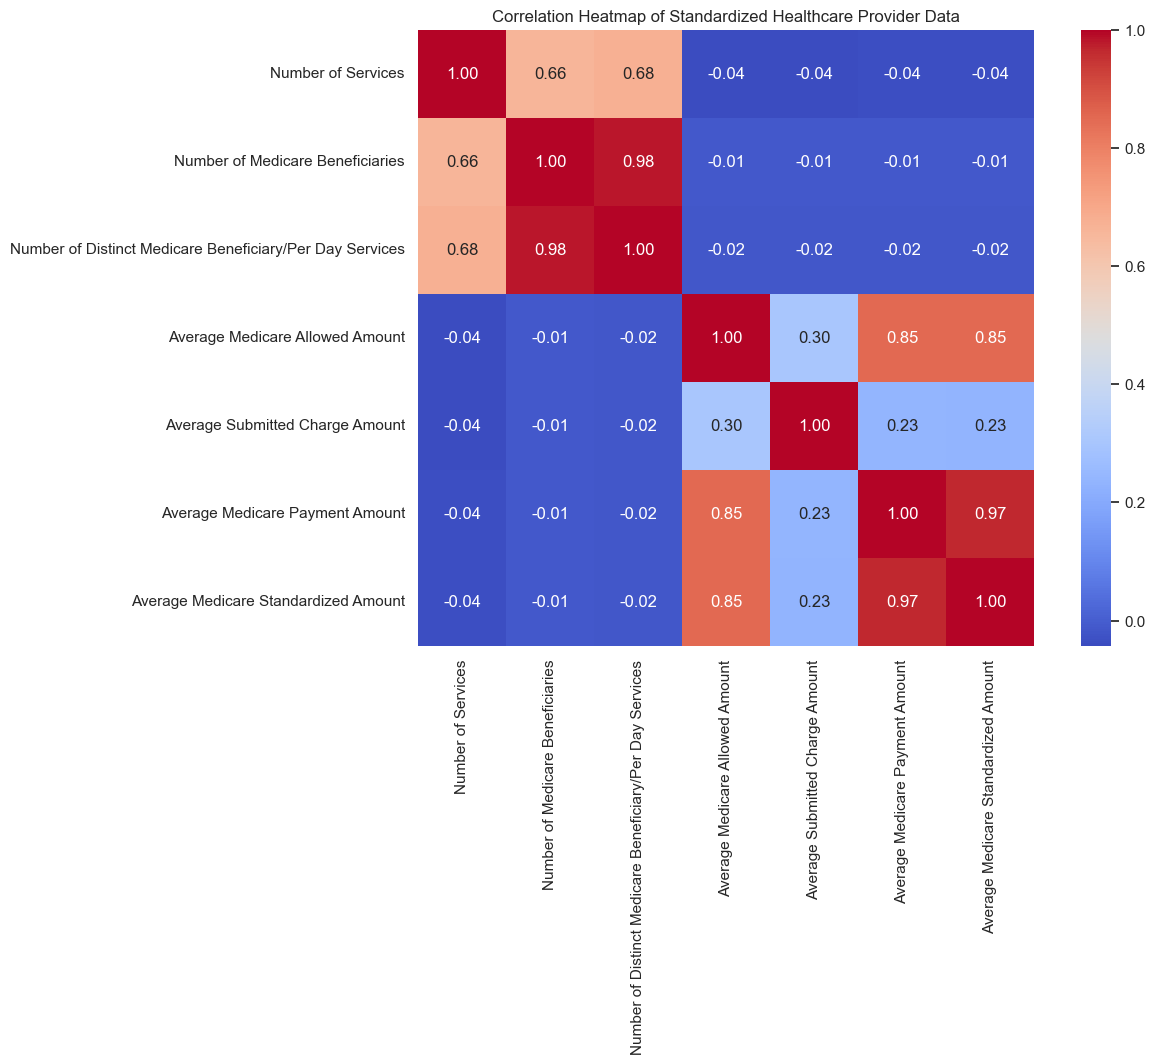

In [23]:
# heatmap after standardization to observe the correlation changes
plt.figure(figsize=(12, 8))
correlation_matrix_standardized = data_standardized[numerical_columns].corr()
sns.heatmap(correlation_matrix_standardized, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Standardized Healthcare Provider Data')
plt.show()

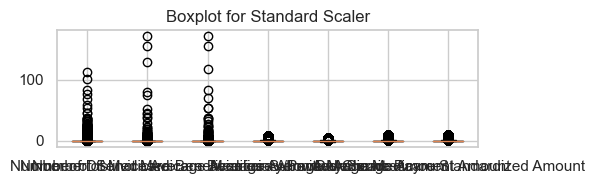


Summary Statistics for Standard Scaler:



,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,-2.439826e-17,2.913225e-18,2.415845e-18,2.280842e-17,1.619682e-16,-1.170264e-16,-5.428547e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-9.171898e-02,-7.102425e-02,-7.993791e-02,-8.404066e-01,-9.327420e-01,-7.518596e-01,-7.558050e-01
25%,-8.770803e-02,-6.561695e-02,-7.445084e-02,-6.104668e-01,-7.102510e-01,-5.431534e-01,-5.399460e-01
50%,-7.888393e-02,-5.209870e-02,-6.225734e-02,-2.256201e-01,-3.031990e-01,-2.413472e-01,-2.366268e-01
75%,-4.880181e-02,-1.334639e-02,-2.201882e-02,2.415208e-01,3.237208e-01,1.699171e-01,1.627179e-01
max,1.133091e+02,1.714260e+02,1.722909e+02,8.839818e+00,4.312085e+00,1.021175e+01,1.017704e+01


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# 1. Standard Scaler
standard_scaler = StandardScaler()
data_standard_scaled = pd.DataFrame(standard_scaler.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)


scaled_data_dict = {
    'Standard Scaler': data_standard_scaled
}

def plot_single_scaler(scaled_data_dict, key, columns):
    plt.figure(figsize=(6, 2))
    df = scaled_data_dict[key]  
    plt.boxplot(df[columns], labels=columns)
    plt.title(f'Boxplot for {key}')
    plt.tight_layout()
    plt.show()
plot_single_scaler(scaled_data_dict, 'Standard Scaler', numerical_columns)
print(f"\nSummary Statistics for Standard Scaler:\n")
display(scaled_data_dict['Standard Scaler'].describe())


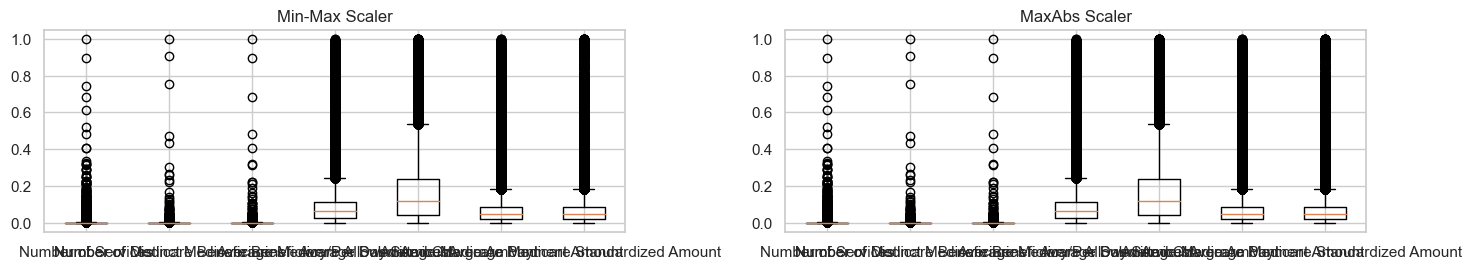


Summary Statistics for Min-Max Scaler:



,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.000809,0.000414,0.000464,0.086817,0.177840,0.068578,0.069132
std,0.008818,0.005831,0.005801,0.103304,0.190665,0.091211,0.091468
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000035,0.000032,0.000032,0.023754,0.042421,0.019036,0.019744
50%,0.000113,0.000110,0.000103,0.063510,0.120031,0.046564,0.047488
75%,0.000378,0.000336,0.000336,0.111767,0.239562,0.084076,0.084015
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Summary Statistics for MaxAbs Scaler:



,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.000848,0.000472,0.000503,0.086817,0.177840,0.068578,0.069132
std,0.008818,0.005831,0.005801,0.103304,0.190665,0.091211,0.091468
min,0.000039,0.000058,0.000039,0.000000,0.000000,0.000000,0.000000
25%,0.000074,0.000089,0.000071,0.023754,0.042421,0.019036,0.019744
50%,0.000152,0.000168,0.000141,0.063510,0.120031,0.046564,0.047488
75%,0.000417,0.000394,0.000375,0.111767,0.239562,0.084076,0.084015
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
from sklearn.preprocessing import  MinMaxScaler, MaxAbsScaler

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# 2. Min-Max Scaler
min_max_scaler = MinMaxScaler()
data_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)

# 3. MaxAbs Scaler
max_abs_scaler = MaxAbsScaler()
data_max_abs_scaled = pd.DataFrame(max_abs_scaler.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)

scaled_data_dict = {
    'Min-Max Scaler': data_min_max_scaled,
    'MaxAbs Scaler': data_max_abs_scaled
}

def plot_comparison(scaled_data_dict, columns):
    plt.figure(figsize=(15, 10))
    for i, (key, df) in enumerate(scaled_data_dict.items()):
        plt.subplot(4, 2, i+1) 
        plt.boxplot(df[columns], labels=columns)
        plt.title(key)
    plt.tight_layout()
    plt.show()

plot_comparison(scaled_data_dict, numerical_columns)
for key, df in scaled_data_dict.items():
    print(f"\nSummary Statistics for {key}:\n")
    display(df.describe())

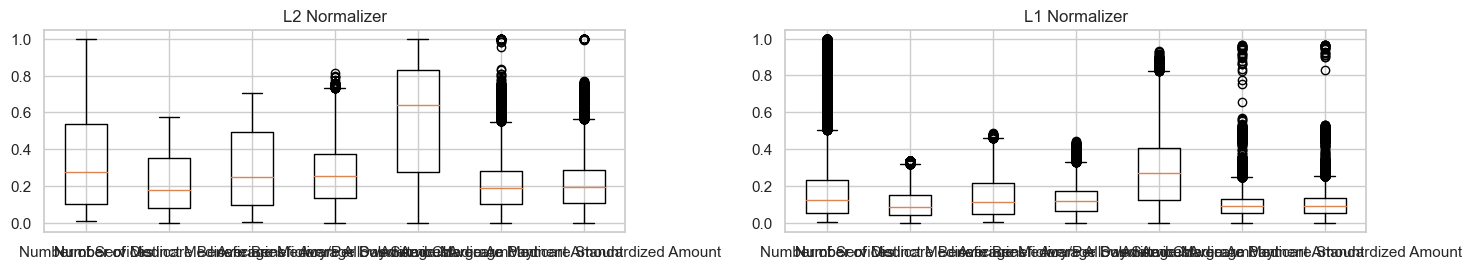


Summary Statistics for L2 Normalizer:



,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.324747,0.221135,0.294362,0.264524,0.554429,0.203986,0.207125
std,0.243312,0.163227,0.213392,0.168442,0.318109,0.133646,0.135314
min,0.006910,0.000227,0.001282,0.000000,0.000000,0.000000,0.000000
25%,0.099438,0.076969,0.093605,0.134551,0.275930,0.103355,0.104837
50%,0.277370,0.180057,0.250622,0.252915,0.639436,0.190061,0.192286
75%,0.537771,0.349517,0.495832,0.373331,0.830055,0.282261,0.288579
max,0.999999,0.577350,0.706936,0.816290,0.999443,0.999789,0.999807



Summary Statistics for L1 Normalizer:



,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.160808,0.102996,0.139792,0.125805,0.274715,0.097277,0.098608
std,0.147915,0.075214,0.106628,0.081892,0.182707,0.067120,0.067410
min,0.003451,0.000226,0.001279,0.000000,0.000000,0.000000,0.000000
25%,0.050894,0.040306,0.048441,0.065741,0.124018,0.050460,0.051389
50%,0.120323,0.083822,0.112442,0.119462,0.271624,0.090352,0.091556
75%,0.232767,0.151805,0.212966,0.172131,0.404810,0.130018,0.132524
max,0.998287,0.333333,0.488573,0.444127,0.935038,0.965619,0.967113


In [26]:
from sklearn.preprocessing import Normalizer

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# 1. L1 Normalization
l1_normalizer = Normalizer(norm='l1')
data_l1_normalized = pd.DataFrame(l1_normalizer.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)

# 2. L2 Normalization
l2_normalizer = Normalizer(norm='l2')
data_l2_normalized = pd.DataFrame(l2_normalizer.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)

scaled_data_dict = {
    'L2 Normalizer': data_l2_normalized,
    'L1 Normalizer': data_l1_normalized
}

def plot_comparison(scaled_data_dict, columns):
    plt.figure(figsize=(15, 10))
    for i, (key, df) in enumerate(scaled_data_dict.items()):
        plt.subplot(4, 2, i+1) 
        plt.boxplot(df[columns], labels=columns)
        plt.title(key)
    plt.tight_layout()
    plt.show()

plot_comparison(scaled_data_dict, numerical_columns)
for key, df in scaled_data_dict.items():
    print(f"\nSummary Statistics for {key}:\n")
    display(df.describe())

In [ ]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

# Power Transformation (Yeo-Johnson)
power_transformer = PowerTransformer()
data_power_transformed = pd.DataFrame(power_transformer.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)

# Quantile Transformation (Normal Distribution)
quantile_transformer = QuantileTransformer(output_distribution='normal')
data_quantile_transformed = pd.DataFrame(quantile_transformer.fit_transform(data_cleaned[numerical_columns]), columns=numerical_columns)

scaled_data_dict = {
    'Power Transformer': data_power_transformed,
    'Quantile Transformer': data_quantile_transformed
}
def plot_comparison(scaled_data_dict, columns):
    plt.figure(figsize=(15, 10))
    for i, (key, df) in enumerate(scaled_data_dict.items()):
        plt.subplot(4, 2, i+1)  # Create subplots
        plt.boxplot(df[columns], labels=columns)
        plt.title(key)
    plt.tight_layout()
    plt.show()
plot_comparison(scaled_data_dict, numerical_columns)
for key, df in scaled_data_dict.items():
    print(f"\nSummary Statistics for {key}:\n")
    display(df.describe())


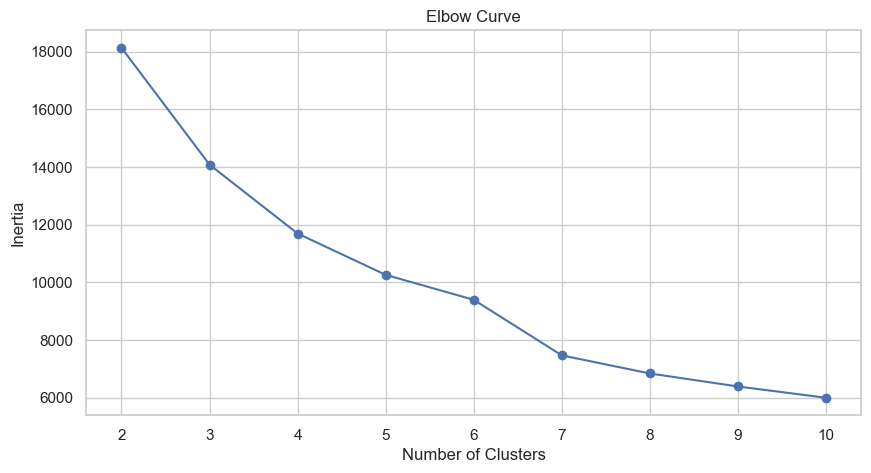

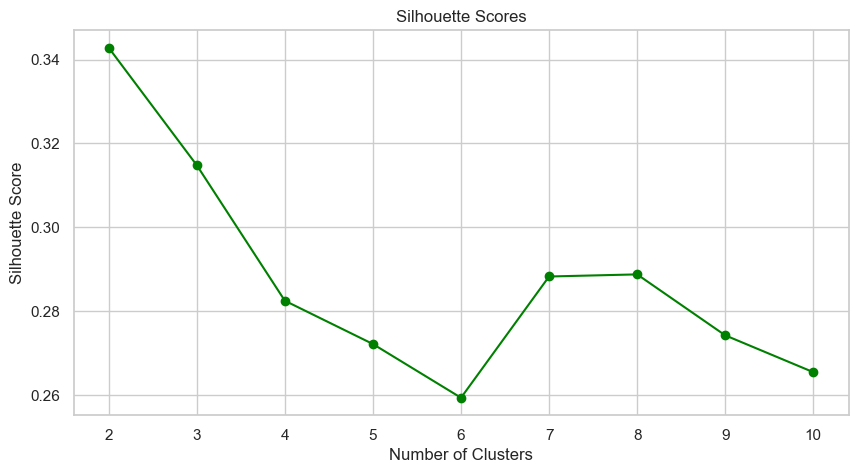

Cluster Sizes:
 Cluster
0    51714
1    48286
Name: count, dtype: int64
Cluster Centers:
 [[0.20381376 0.18808174 0.19376438 0.43452637 0.46477814 0.44110391
  0.43952688]
 [0.59385243 0.56312305 0.57774382 0.40007793 0.44770241 0.40525578
  0.40397455]]


In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

path = 'cleaned_healthcare.csv'  
data = pd.read_csv(path)

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
data_numeric = data[numerical_columns]
for col in numerical_columns:
    data_numeric.loc[:, col] = data_numeric[col].astype(str).str.replace(',', '', regex=True).astype(float)
    
scaler = PowerTransformer()
data_standardized = scaler.fit_transform(data_numeric)

normalizer = MinMaxScaler()
data_normalized = normalizer.fit_transform(data_standardized)

# Finding the optimal number of clusters using Elbow Method
inertia = []
sil_scores = []
k_values = range(2, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(data_normalized, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(k_values, sil_scores, marker='o', color='green')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.show()

optimal_k = sil_scores.index(max(sil_scores)) + 2  
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(data_normalized)

data['Cluster'] = kmeans_optimal.labels_
print("Cluster Sizes:\n", data['Cluster'].value_counts())
print("Cluster Centers:\n", kmeans_optimal.cluster_centers_)


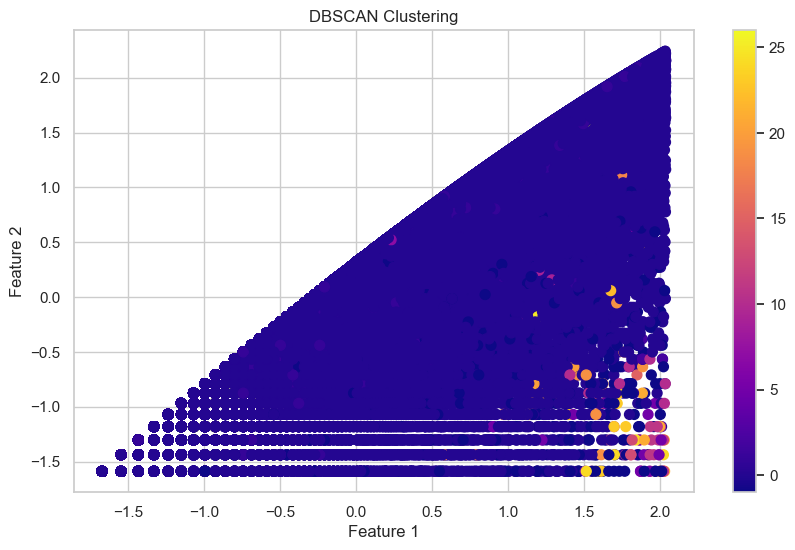

'Number of anomalies detected: 9507'

'Number of normal data points: 90493'

'Unique clusters identified by DBSCAN: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22\n 23 24 25 26]'

DBSCAN_Cluster
 0.0     90493
 1.0      5823
-1.0       579
 4.0       236
 5.0        21
 11.0       17
 8.0        14
 7.0        13
 12.0       13
 10.0       11
 17.0       10
 3.0         9
 6.0         9
 2.0         9
 19.0        9
 9.0         8
 16.0        7
 21.0        7
 20.0        7
 18.0        7
 23.0        7
 14.0        7
 15.0        6
 13.0        6
 26.0        5
 24.0        5
 22.0        5
 25.0        4
Name: count, dtype: int64

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data_numeric = data[numerical_columns].dropna()

scaler = PowerTransformer()
data_scaled = scaler.fit_transform(data_numeric)

dbscan_model = DBSCAN(eps=0.5, min_samples=5)  
dbscan_labels = dbscan_model.fit_predict(data_scaled)

data['DBSCAN_Cluster'] = np.nan
data.loc[data_numeric.index, 'DBSCAN_Cluster'] = dbscan_labels

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=dbscan_labels, cmap='plasma', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

normal_data = data[data['DBSCAN_Cluster'] == 0]
anomalies = data[data['DBSCAN_Cluster'] != 0]

display(f"Number of anomalies detected: {len(anomalies)}")
display(f"Number of normal data points: {len(normal_data)}")

unique_clusters = np.unique(dbscan_labels)
display(f"Unique clusters identified by DBSCAN: {unique_clusters}")
display(data['DBSCAN_Cluster'].value_counts())


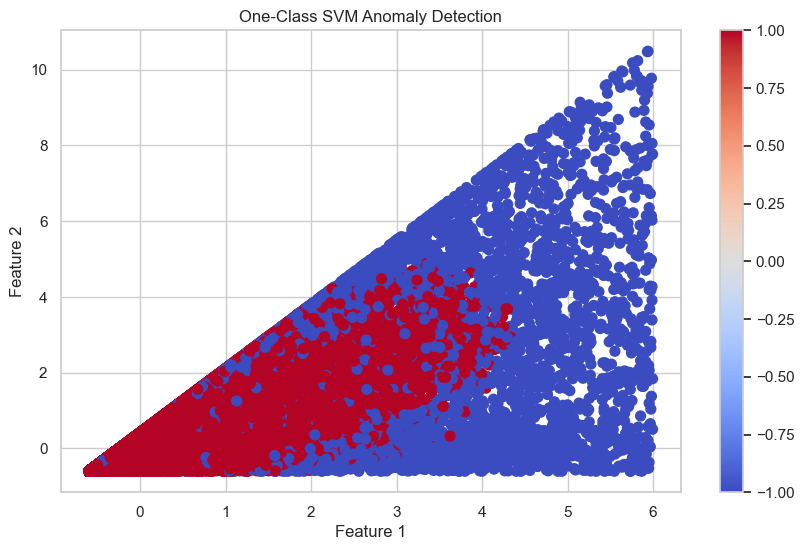

'Number of anomalies detected: 9733'

,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Cluster,DBSCAN_Cluster,SVM_Anomaly
22,1528061959,AHUJA,M.D.,0,1,2551 GREENWOOD RD,SHREVEPORT,711033981.0,LA,US,...,272.0,252.0,272.0,79.49,762.37,60.21,60.93,1,0.0,-1.0
30,1568818219,MATHEW,MD,1,1,11 FOUNDERS POINTE N,BLOOMINGDALE,601081459.0,IL,US,...,552.0,97.0,552.0,82.62,140.27,63.62,60.58,1,0.0,-1.0
36,1053584482,"EMPIRE CITY LABORATORIES, INC",MD,0,0,4306 3RD AVE FL 2,BROOKLYN,112323604.0,NY,US,...,542.0,509.0,542.0,15.81,50.49,15.49,15.49,1,0.0,-1.0
54,1972779411,MIGLIS,MD,0,1,450 BROADWAY ST M/C 5704,REDWOOD CITY,940635704.0,CA,US,...,24.0,24.0,24.0,139.44,964.04,94.85,83.88,0,0.0,-1.0
72,1306040902,YANCI TORRES,MD,1,1,1701 3RD ST SE,PUYALLUP,983724511.0,WA,US,...,42.0,40.0,42.0,667.01,0.00,517.97,515.00,0,1.0,-1.0


'Number of normal data points: 87614'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data_numeric = data[numerical_columns].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1) 
svm_labels = svm_model.fit_predict(data_scaled)

data['SVM_Anomaly'] = np.nan
data.loc[data_numeric.index, 'SVM_Anomaly'] = svm_labels

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=svm_labels, cmap='coolwarm', s=50)
plt.title('One-Class SVM Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

anomalies = data[data['SVM_Anomaly'] == -1]
display(f"Number of anomalies detected: {len(anomalies)}")
display(anomalies.head())

normal_data = data[data['SVM_Anomaly'] == 1]
display(f"Number of normal data points: {len(normal_data)}")


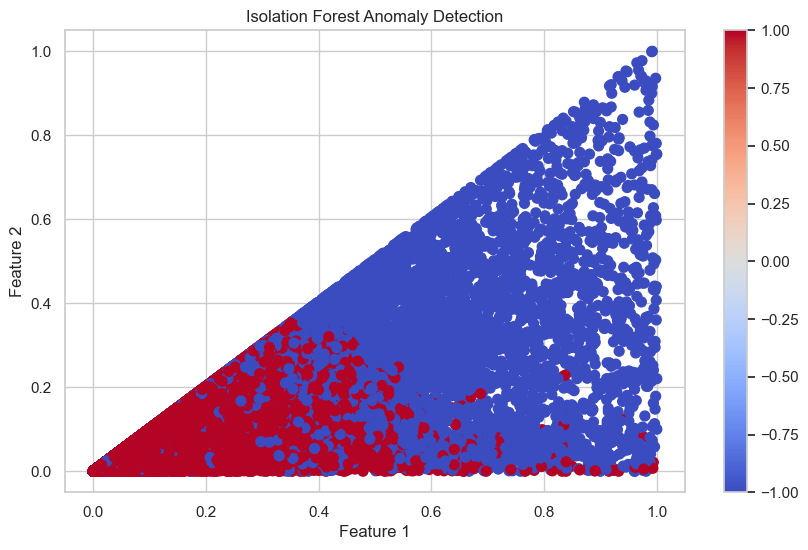

'Number of anomalies detected: 9735'

,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Cluster,DBSCAN_Cluster,SVM_Anomaly,Isolation_Anomaly
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,175.0,175.0,123.73,548.80,118.83,135.32,1,0.0,1.0,-1.0
16,1366846719,ORREGO,PA-C,1,1,1801 INWOOD RD FL 7,DALLAS,753908530.0,TX,US,...,300.0,364.0,63.16,193.56,40.65,41.18,1,0.0,1.0,-1.0
22,1528061959,AHUJA,M.D.,0,1,2551 GREENWOOD RD,SHREVEPORT,711033981.0,LA,US,...,252.0,272.0,79.49,762.37,60.21,60.93,1,0.0,-1.0,-1.0
30,1568818219,MATHEW,MD,1,1,11 FOUNDERS POINTE N,BLOOMINGDALE,601081459.0,IL,US,...,97.0,552.0,82.62,140.27,63.62,60.58,1,0.0,-1.0,-1.0
36,1053584482,"EMPIRE CITY LABORATORIES, INC",MD,0,0,4306 3RD AVE FL 2,BROOKLYN,112323604.0,NY,US,...,509.0,542.0,15.81,50.49,15.49,15.49,1,0.0,-1.0,-1.0


'Number of normal data points: 87612'

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data_numeric = data[numerical_columns].dropna()

scaler_standard = StandardScaler()
data_scaled_standard = scaler_standard.fit_transform(data_numeric)

scaler_minmax = MinMaxScaler()
data_scaled_minmax = scaler_minmax.fit_transform(data_scaled_standard)

iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_labels = iso_forest.fit_predict(data_scaled_minmax)

data['Isolation_Anomaly'] = np.nan
data.loc[data_numeric.index, 'Isolation_Anomaly'] = iso_labels

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled_minmax[:, 0], data_scaled_minmax[:, 1], c=iso_labels, cmap='coolwarm', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

anomalies = data[data['Isolation_Anomaly'] == -1]
display(f"Number of anomalies detected: {len(anomalies)}")
display(anomalies.head())

normal_data = data[data['Isolation_Anomaly'] == 1]
display(f"Number of normal data points: {len(normal_data)}")


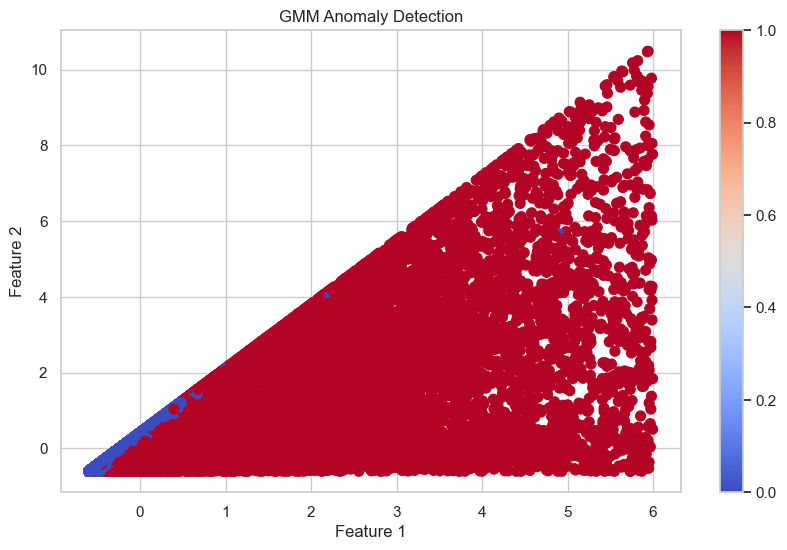

'Number of anomalies detected by GMM: 28983'

,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Cluster,DBSCAN_Cluster,SVM_Anomaly,Isolation_Anomaly,GMM_Anomaly,KNN_Anomaly
4,1073627758,PERROTTI,DO,0,1,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,26.52,40.00,19.54,19.06,0,0.0,1.0,1.0,1.0,1.0
5,1346571551,PUGH,DPT,0,1,504 ALBEMARLE SQ,CHARLOTTESVILLE,229017405.0,VA,US,...,13.55,63.11,9.68,10.51,1,0.0,1.0,1.0,1.0,1.0
16,1366846719,ORREGO,PA-C,1,1,1801 INWOOD RD FL 7,DALLAS,753908530.0,TX,US,...,63.16,193.56,40.65,41.18,1,0.0,1.0,-1.0,1.0,1.0
22,1528061959,AHUJA,M.D.,0,1,2551 GREENWOOD RD,SHREVEPORT,711033981.0,LA,US,...,79.49,762.37,60.21,60.93,1,0.0,-1.0,-1.0,1.0,1.0
29,1740336247,TAITANO,MD,0,1,851 GOVERNOR CARLOS CAMACHO ROAD,TAMUNING,969133153.0,GU,US,...,71.45,100.20,55.28,57.40,1,0.0,1.0,1.0,1.0,1.0


'Number of normal data points by GMM: 68364'

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data_numeric = data[numerical_columns].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

gmm_model = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_labels = gmm_model.fit_predict(data_scaled)

anomaly_threshold = gmm_model.predict_proba(data_scaled)[:, 1]  
threshold = 0.01
gmm_anomaly_labels = (anomaly_threshold < threshold).astype(int)

data['GMM_Anomaly'] = np.nan
data.loc[data_numeric.index, 'GMM_Anomaly'] = gmm_anomaly_labels

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=gmm_anomaly_labels, cmap='coolwarm', s=50)
plt.title('GMM Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

gmm_anomalies = data[data['GMM_Anomaly'] == 1]
display(f"Number of anomalies detected by GMM: {len(gmm_anomalies)}")
display(gmm_anomalies.head())

normal_data_gmm = data[data['GMM_Anomaly'] == 0]
display(f"Number of normal data points by GMM: {len(normal_data_gmm)}")


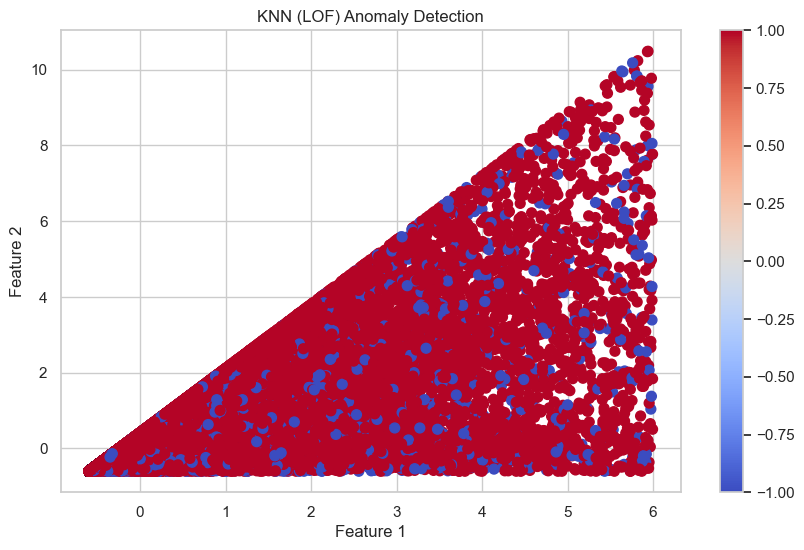

'Number of anomalies detected by KNN (LOF): 9735'

,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Cluster,DBSCAN_Cluster,SVM_Anomaly,Isolation_Anomaly,GMM_Anomaly,KNN_Anomaly
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,123.73,548.80,118.83,135.32,1,0.0,1.0,-1.0,0.0,-1.0
9,1396781134,METWEST INC,MD,0,0,695 S BROADWAY,DENVER,802094003.0,CO,US,...,6.51,29.65,6.38,6.38,0,0.0,1.0,1.0,0.0,-1.0
25,1649233297,CHESTER,PA-C,0,1,1188 YADKINVILLE RD,MOCKSVILLE,270282037.0,NC,US,...,35.70,149.00,25.76,27.16,1,0.0,1.0,1.0,0.0,-1.0
44,1003292277,BRICKEY,AU.D.,1,1,700 W KENT AVE,MISSOULA,598016772.0,MT,US,...,32.09,32.09,23.22,23.11,0,0.0,1.0,1.0,0.0,-1.0
49,1174532386,KODITYAL,MD,0,1,420 E 6TH ST,ODESSA,797614529.0,TX,US,...,0.12,25.00,0.08,0.08,1,0.0,1.0,1.0,0.0,-1.0


'Number of normal data points by KNN (LOF): 87612'

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data_numeric = data[numerical_columns].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.1) 
lof_labels = lof_model.fit_predict(data_scaled)

data['KNN_Anomaly'] = np.nan
data.loc[data_numeric.index, 'KNN_Anomaly'] = lof_labels

plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=lof_labels, cmap='coolwarm', s=50)
plt.title('KNN (LOF) Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()

knn_anomalies = data[data['KNN_Anomaly'] == -1]
display(f"Number of anomalies detected by KNN (LOF): {len(knn_anomalies)}")
display(knn_anomalies.head())

normal_data_knn = data[data['KNN_Anomaly'] == 1]
display(f"Number of normal data points by KNN (LOF): {len(normal_data_knn)}")


K-Means:
  Execution Time: 119.46894454956055
  Silhouette Score: 0.2949907991373888
  Anomalies Detected: 89536


DBSCAN:
  Execution Time: 180.9003586769104
  Silhouette Score: -0.2751219265548227
  Anomalies Detected: 6701


One-Class SVM:
  Execution Time: 341.056129693985
  Anomalies Detected: 4738


Isolation Forest:
  Execution Time: 1.4217803478240967
  Anomalies Detected: 4739


GMM:
  Execution Time: 161.71382474899292
  Silhouette Score: 0.08232377301441446
  Anomalies Detected: 65238


KNN (LOF):
  Execution Time: 7.743484973907471
  Anomalies Detected: 4739




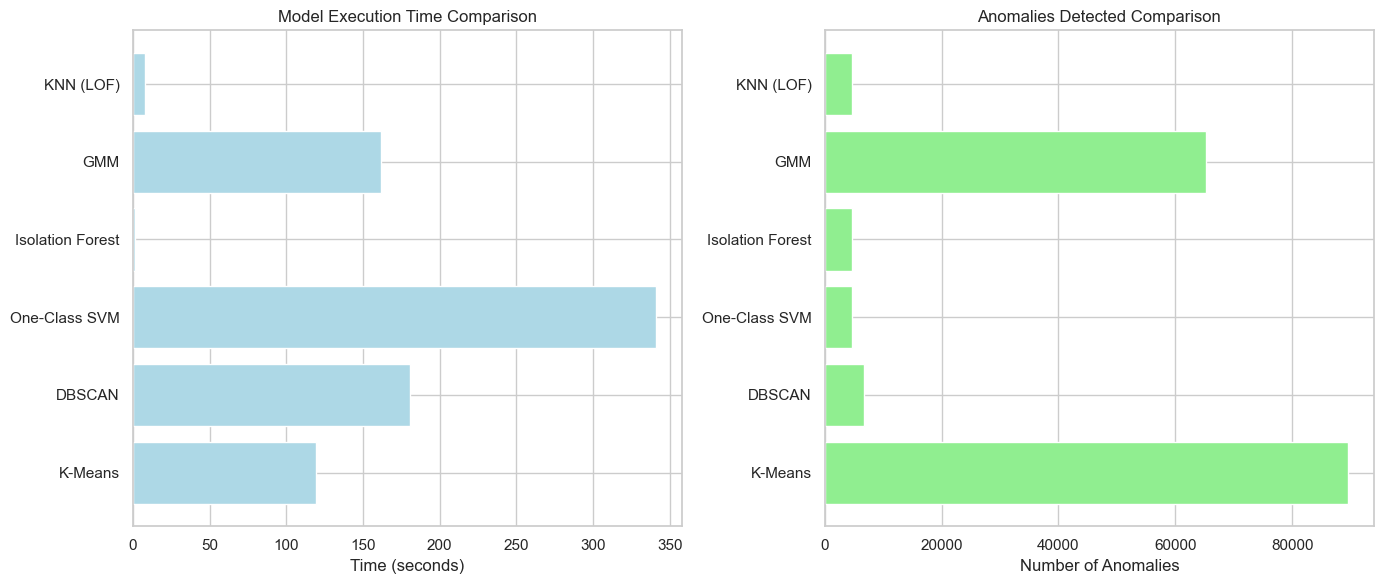

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data_numeric = data[numerical_columns].dropna()
power_transformer = PowerTransformer()
data_power_scaled = power_transformer.fit_transform(data_numeric)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

def model_comparison():
    results = {}

    # 1. K-Means with Power Transformer
    start_time = time.time()
    kmeans = KMeans(n_clusters=6, random_state=42)
    kmeans_labels = kmeans.fit_predict(data_power_scaled)
    sil_score_kmeans = silhouette_score(data_power_scaled, kmeans_labels)
    results['K-Means'] = {
        'Execution Time': time.time() - start_time,
        'Silhouette Score': sil_score_kmeans,
        'Anomalies Detected': np.sum(kmeans_labels != 0)
    }

    # 2. DBSCAN with LOF using Power Transformer
    start_time = time.time()
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(data_power_scaled)
    sil_score_dbscan = silhouette_score(data_power_scaled, dbscan_labels) if len(set(dbscan_labels)) > 1 else -1
    results['DBSCAN'] = {
        'Execution Time': time.time() - start_time,
        'Silhouette Score': sil_score_dbscan,
        'Anomalies Detected': np.sum(dbscan_labels != 0)
    }

    # 3. One-Class SVM with Standard Scaler
    start_time = time.time()
    svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
    svm_labels = svm.fit_predict(data_scaled)
    results['One-Class SVM'] = {
        'Execution Time': time.time() - start_time,
        'Anomalies Detected': np.sum(svm_labels == -1)
    }

    # 4. Isolation Forest with Standard Scaler
    start_time = time.time()
    iso_forest = IsolationForest(contamination=0.05, random_state=42)
    iso_labels = iso_forest.fit_predict(data_scaled)
    results['Isolation Forest'] = {
        'Execution Time': time.time() - start_time,
        'Anomalies Detected': np.sum(iso_labels == -1)
    }

    # 5. GMM with Power Transformer
    start_time = time.time()
    gmm = GaussianMixture(n_components=3, random_state=42)
    gmm_labels = gmm.fit_predict(data_power_scaled)
    sil_score_gmm = silhouette_score(data_power_scaled, gmm_labels)
    results['GMM'] = {
        'Execution Time': time.time() - start_time,
        'Silhouette Score': sil_score_gmm,
        'Anomalies Detected': np.sum(gmm_labels != 0)
    }

    # 6. KNN (LOF) with Standard Scaler
    start_time = time.time()
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    lof_labels = lof.fit_predict(data_scaled)
    results['KNN (LOF)'] = {
        'Execution Time': time.time() - start_time,
        'Anomalies Detected': np.sum(lof_labels == -1)
    }

    return results
model_results = model_comparison()

for model, metrics in model_results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    print("\n")

labels = list(model_results.keys())
execution_times = [metrics['Execution Time'] for metrics in model_results.values()]
anomalies_detected = [metrics['Anomalies Detected'] for metrics in model_results.values()]

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.barh(labels, execution_times, color='lightblue')
plt.title('Model Execution Time Comparison')
plt.xlabel('Time (seconds)')

plt.subplot(1, 2, 2)
plt.barh(labels, anomalies_detected, color='lightgreen')
plt.title('Anomalies Detected Comparison')
plt.xlabel('Number of Anomalies')

plt.tight_layout()
plt.show()


Isolation Forest - Average Anomaly Score (Anomalies): 0.05125928451753893
Isolation Forest - Average Anomaly Score (Normal): -0.15962886329784337
GMM - Average Anomaly Score (Anomalies): -0.574428125470815
GMM - Average Anomaly Score (Normal): 6.609159655075215
Isolation Forest - Anomaly Score Separation: 0.2108881478153823
GMM - Anomaly Score Separation: -7.183587780546031
Isolation Forest - Silhouette Score: 0.6236873704748767
GMM - Silhouette Score: 0.17162398707242557


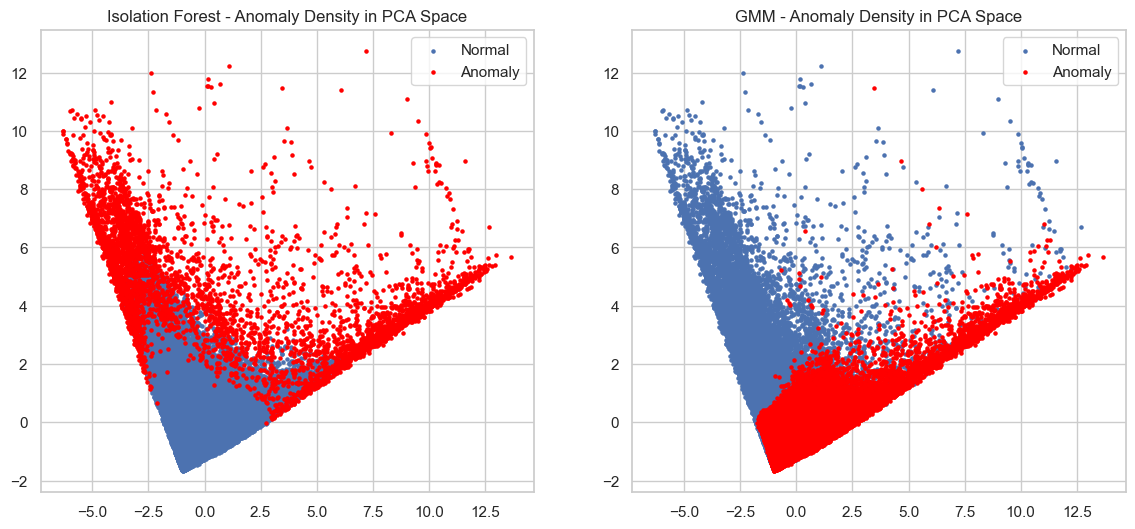

Isolation Forest - Reconstruction Error (Normal): 0.2637947033119701
GMM - Reconstruction Error (Normal): 0.35062107374605367


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy="mean")
data_imputed = imputer.fit_transform(data[numerical_columns]) 

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed)

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_labels = iso_forest.fit_predict(data_scaled)
iso_scores = iso_forest.decision_function(data_scaled) * -1  
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(data_scaled)
gmm_scores = -gmm.score_samples(data_scaled) 

iso_avg_score_anomalies = np.mean(iso_scores[iso_labels == -1])
iso_avg_score_normal = np.mean(iso_scores[iso_labels == 1])
gmm_avg_score_anomalies = np.mean(gmm_scores[gmm_labels == 1])  # Assuming 1 is anomaly cluster in GMM
gmm_avg_score_normal = np.mean(gmm_scores[gmm_labels == 0])  # Assuming 0 is normal cluster in GMM

print("Isolation Forest - Average Anomaly Score (Anomalies):", iso_avg_score_anomalies)
print("Isolation Forest - Average Anomaly Score (Normal):", iso_avg_score_normal)
print("GMM - Average Anomaly Score (Anomalies):", gmm_avg_score_anomalies)
print("GMM - Average Anomaly Score (Normal):", gmm_avg_score_normal)

# Separation of Anomalies and Normal Data
iso_score_separation = iso_avg_score_anomalies - iso_avg_score_normal
gmm_score_separation = gmm_avg_score_anomalies - gmm_avg_score_normal

print("Isolation Forest - Anomaly Score Separation:", iso_score_separation)
print("GMM - Anomaly Score Separation:", gmm_score_separation)

# Silhouette Score for Anomalies
iso_silhouette_score = silhouette_score(data_scaled, iso_labels)
gmm_silhouette_score = silhouette_score(data_scaled, gmm_labels)

print("Isolation Forest - Silhouette Score:", iso_silhouette_score)
print("GMM - Silhouette Score:", gmm_silhouette_score)

pca = PCA(n_components=2, random_state=42)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[iso_labels == 1, 0], data_pca[iso_labels == 1, 1], s=5, label="Normal")
plt.scatter(data_pca[iso_labels == -1, 0], data_pca[iso_labels == -1, 1], s=5, color="red", label="Anomaly")
plt.title("Isolation Forest - Anomaly Density in PCA Space")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data_pca[gmm_labels == 0, 0], data_pca[gmm_labels == 0, 1], s=5, label="Normal")
plt.scatter(data_pca[gmm_labels == 1, 0], data_pca[gmm_labels == 1, 1], s=5, color="red", label="Anomaly")
plt.title("GMM - Anomaly Density in PCA Space")
plt.legend()

plt.show()

# Reconstruction Error for Normal Data (using PCA as a proxy for reconstruction)
iso_recon_error = np.mean((data_scaled[iso_labels == 1] - pca.inverse_transform(data_pca[iso_labels == 1])) ** 2)
gmm_recon_error = np.mean((data_scaled[gmm_labels == 0] - pca.inverse_transform(data_pca[gmm_labels == 0])) ** 2)

print("Isolation Forest - Reconstruction Error (Normal):", iso_recon_error)
print("GMM - Reconstruction Error (Normal):", gmm_recon_error)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.metrics import silhouette_score
import numpy as np

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
one_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05) 

iso_labels = iso_forest.fit_predict(data_scaled)
iso_scores = iso_forest.decision_function(data_scaled) * -1  # Inverted the scores for consistency

svm_labels = one_svm.fit_predict(data_scaled)
svm_scores = one_svm.decision_function(data_scaled)

iso_anomaly_scores = iso_scores[iso_labels == -1]
iso_normal_scores = iso_scores[iso_labels == 1]

svm_anomaly_scores = svm_scores[svm_labels == -1]
svm_normal_scores = svm_scores[svm_labels == 1]

iso_avg_anomaly_score = np.mean(iso_anomaly_scores)
iso_avg_normal_score = np.mean(iso_normal_scores)
iso_score_separation = iso_avg_normal_score - iso_avg_anomaly_score

svm_avg_anomaly_score = np.mean(svm_anomaly_scores)
svm_avg_normal_score = np.mean(svm_normal_scores)
svm_score_separation = svm_avg_normal_score - svm_avg_anomaly_score

iso_silhouette_score = silhouette_score(data_scaled, iso_labels)
svm_silhouette_score = silhouette_score(data_scaled, svm_labels)

iso_reconstruction_error = np.mean(np.abs(iso_normal_scores))
svm_reconstruction_error = np.mean(np.abs(svm_normal_scores))

print("Isolation Forest - Average Anomaly Score (Anomalies):", iso_avg_anomaly_score)
print("Isolation Forest - Average Anomaly Score (Normal):", iso_avg_normal_score)
print("Isolation Forest - Anomaly Score Separation:", iso_score_separation)
print("Isolation Forest - Silhouette Score:", iso_silhouette_score)
print("Isolation Forest - Reconstruction Error (Normal):", iso_reconstruction_error)
print("\n")
print("One-Class SVM - Average Anomaly Score (Anomalies):", svm_avg_anomaly_score)
print("One-Class SVM - Average Anomaly Score (Normal):", svm_avg_normal_score)
print("One-Class SVM - Anomaly Score Separation:", svm_score_separation)
print("One-Class SVM - Silhouette Score:", svm_silhouette_score)
print("One-Class SVM - Reconstruction Error (Normal):", svm_reconstruction_error)


Isolation Forest - Average Anomaly Score (Anomalies): 0.06416402918669165
Isolation Forest - Average Anomaly Score (Normal): -0.17906627297774685
Isolation Forest - Anomaly Score Separation: -0.2432303021644385
Isolation Forest - Silhouette Score: 0.6799441051433097
Isolation Forest - Reconstruction Error (Normal): 0.17906627297774685


One-Class SVM - Average Anomaly Score (Anomalies): -59.241407952263636
One-Class SVM - Average Anomaly Score (Normal): 35.053387409045556
One-Class SVM - Anomaly Score Separation: 94.29479536130918
One-Class SVM - Silhouette Score: 0.6177452343912394
One-Class SVM - Reconstruction Error (Normal): 35.053387409045556


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from scipy.spatial.distance import cdist

# Initialize models
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
kmeans = KMeans(n_clusters=6, random_state=42)

iso_labels = iso_forest.fit_predict(data_scaled)
iso_scores = iso_forest.decision_function(data_scaled) * -1 
kmeans.fit(data_scaled)
kmeans_labels = kmeans.predict(data_scaled)

distances = cdist(data_scaled, kmeans.cluster_centers_, metric='euclidean')
kmeans_scores = np.min(distances, axis=1)
threshold = np.percentile(kmeans_scores, 95)
kmeans_labels = np.where(kmeans_scores > threshold, -1, 1)

iso_anomaly_scores = iso_scores[iso_labels == -1]
iso_normal_scores = iso_scores[iso_labels == 1]
kmeans_anomaly_scores = kmeans_scores[kmeans_labels == -1]
kmeans_normal_scores = kmeans_scores[kmeans_labels == 1]

iso_avg_anomaly_score = np.mean(iso_anomaly_scores)
iso_avg_normal_score = np.mean(iso_normal_scores)
iso_score_separation = iso_avg_normal_score - iso_avg_anomaly_score
kmeans_avg_anomaly_score = np.mean(kmeans_anomaly_scores)
kmeans_avg_normal_score = np.mean(kmeans_normal_scores)
kmeans_score_separation = kmeans_avg_normal_score - kmeans_avg_anomaly_score

iso_silhouette_score = silhouette_score(data_scaled, iso_labels)
kmeans_silhouette_score = silhouette_score(data_scaled, kmeans_labels)

iso_reconstruction_error = np.mean(np.abs(iso_normal_scores))
kmeans_reconstruction_error = np.mean(np.abs(kmeans_normal_scores))

print("Isolation Forest - Average Anomaly Score (Anomalies):", iso_avg_anomaly_score)
print("Isolation Forest - Average Anomaly Score (Normal):", iso_avg_normal_score)
print("Isolation Forest - Anomaly Score Separation:", iso_score_separation)
print("Isolation Forest - Silhouette Score:", iso_silhouette_score)
print("Isolation Forest - Reconstruction Error (Normal):", iso_reconstruction_error)
print("\n")
print("KMeans - Average Anomaly Score (Anomalies):", kmeans_avg_anomaly_score)
print("KMeans - Average Anomaly Score (Normal):", kmeans_avg_normal_score)
print("KMeans - Anomaly Score Separation:", kmeans_score_separation)
print("KMeans - Silhouette Score:", kmeans_silhouette_score)
print("KMeans - Reconstruction Error (Normal):", kmeans_reconstruction_error)


Isolation Forest - Average Anomaly Score (Anomalies): 0.06416402918669165
Isolation Forest - Average Anomaly Score (Normal): -0.17906627297774685
Isolation Forest - Anomaly Score Separation: -0.2432303021644385
Isolation Forest - Silhouette Score: 0.6799441051433097
Isolation Forest - Reconstruction Error (Normal): 0.17906627297774685


KMeans - Average Anomaly Score (Anomalies): 3.829147483999697
KMeans - Average Anomaly Score (Normal): 0.9116992773046534
KMeans - Anomaly Score Separation: -2.9174482066950436
KMeans - Silhouette Score: 0.6229649970722475
KMeans - Reconstruction Error (Normal): 0.9116992773046534


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
import numpy as np

data = pd.read_csv('cleaned_healthcare.csv')
display(data.head())

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)
X = data[numerical_columns]
power_transformer = PowerTransformer()
X_power_transformed = power_transformer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_power_transformed)

X_train, X_temp = train_test_split(X_scaled, test_size=0.2, random_state=42)
X_val, X_test = train_test_split(X_temp, test_size=0.5, random_state=42)

X_train = X_train[~np.isnan(X_train).any(axis=1)]
X_val = X_val[~np.isnan(X_val).any(axis=1)]
X_test = X_test[~np.isnan(X_test).any(axis=1)]

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,UPADHYAYULA,M.D.,1,1,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,MO,US,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.59,305.21,157.26,160.91
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.80,118.83,135.32
2,1306820956,DUROCHER,DPM,0,1,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155.00,64.44,60.60
3,1770523540,FULLARD,MD,0,1,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,81002,"Urinalysis, manual test",N,20,18,20,3.50,5.00,3.43,3.43
4,1073627758,PERROTTI,DO,0,1,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40.00,19.54,19.06


Training set shape: (77877, 8)
Validation set shape: (9735, 8)
Test set shape: (9735, 8)


In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
import numpy as np
import matplotlib.pyplot as plt
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_samples': [0.5, 0.625, 0.75, 0.875, 1.0],
    'contamination': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'max_features': [0.5, 0.625, 0.75, 0.875, 1.0]
}
iso_forest = IsolationForest(random_state=42)
def custom_nan_handler_scorer(estimator, X, y=None):
    score = estimator.score_samples(X)
    return np.nanmean(score) if np.isnan(score).any() else np.mean(score)

# GridSearchCV 
grid_search = GridSearchCV(
    estimator=iso_forest,
    param_grid=param_grid,
    scoring=custom_nan_handler_scorer,
    cv=3,
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_train)
anomaly_ratio = np.mean(y_pred == -1) * 100
print(f"Anomaly Ratio: {anomaly_ratio:.2f}%")

def visualize_results(model, X):
    scores = model.score_samples(X)
    plt.hist(scores, bins=30, color='skyblue')
    plt.xlabel('Anomaly Scores')
    plt.ylabel('Frequency')
    plt.title('Anomaly Score Distribution')
    plt.show()
visualize_results(best_model, X_train)

Fitting 3 folds for each of 1050 candidates, totalling 3150 fits


KeyboardInterrupt: 

Fitting 3 folds for each of 1050 candidates, totalling 3150 fits
Best Parameters: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0, 'contamination': 0.44555555555555554}


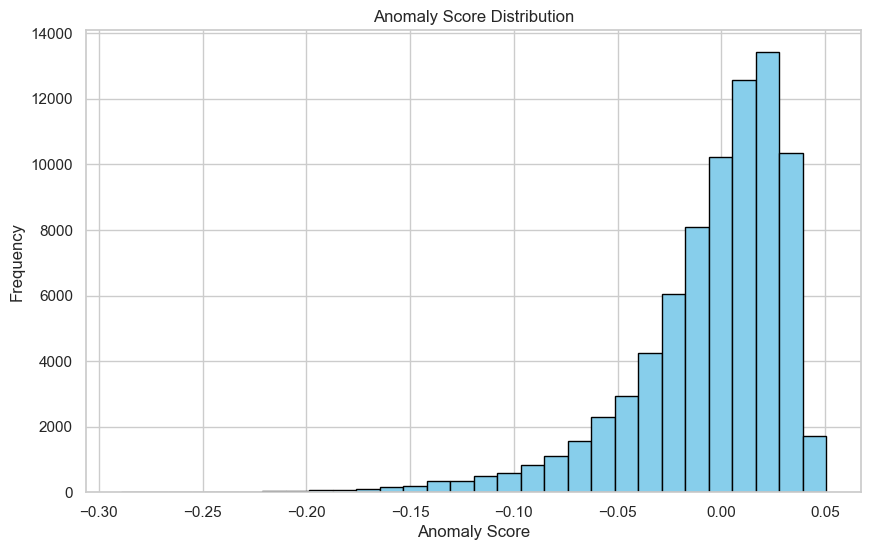

Anomaly Ratio: 1.01%


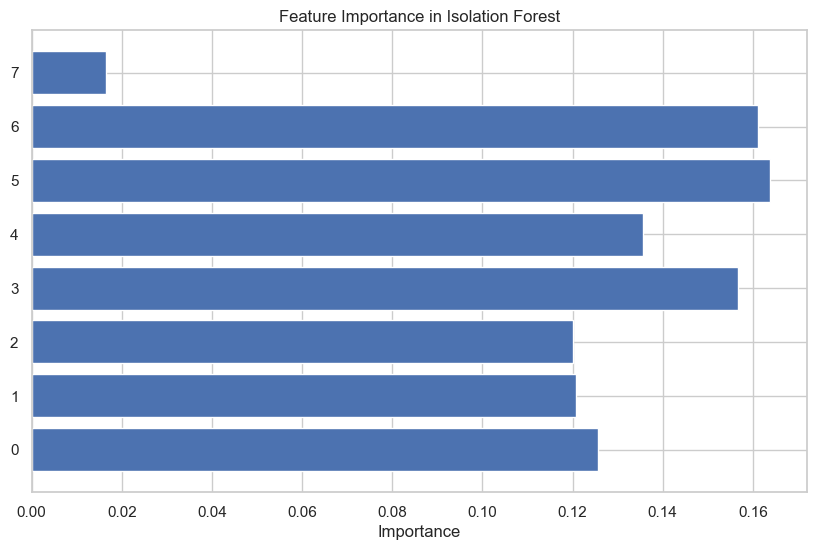

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

param_dist = {
    'n_estimators': np.arange(50, 300, 50),
    'max_samples': np.linspace(0.5, 1.0, 5),
    'contamination': np.linspace(0.01, 0.5, 10),
    'max_features': np.linspace(0.5, 1.0, 5)
}
iso_forest = IsolationForest(random_state=42)
def custom_nan_handler_scorer(estimator, X, y=None):
    score = estimator.score_samples(X)
    return np.nanmean(score) if np.isnan(score).any() else np.mean(score)

# Randomized search 
random_search = RandomizedSearchCV(
    estimator=iso_forest,
    param_distributions=param_dist,
    n_iter=1050, 
    scoring=custom_nan_handler_scorer,
    cv=3,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X_train)

print("Best Parameters:", random_search.best_params_)
best_model = random_search.best_estimator_
train_scores = best_model.decision_function(X_train)

# --- Visualization ---

# 1. Anomaly Score Distribution
plt.figure(figsize=(10, 6))
plt.hist(train_scores, bins=30, color='skyblue', edgecolor='black')
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

# --- Anomaly Ratio and Importance ---

# Anomaly Ratio
anomaly_ratio = np.mean(y_pred == -1)
print(f"Anomaly Ratio: {anomaly_ratio:.2%}")

# Feature Importance Visualization
feature_importance = np.mean([tree.feature_importances_ for tree in best_model.estimators_], axis=0)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance, align='center')
plt.xlabel("Importance")
plt.title("Feature Importance in Isolation Forest")
plt.show()


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

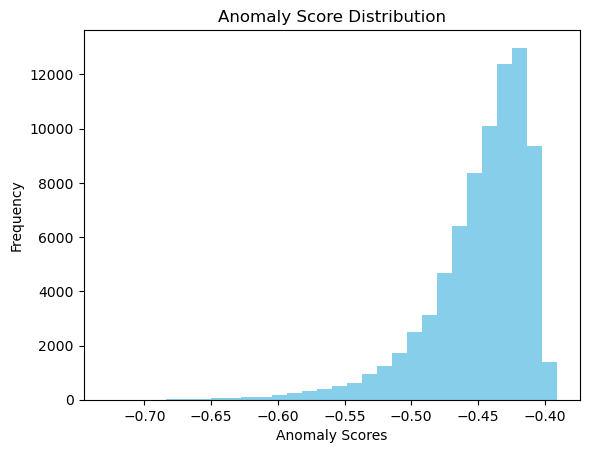

In [ ]:
from sklearn.ensemble import IsolationForest
from skopt import BayesSearchCV
import numpy as np
import matplotlib.pyplot as plt

def custom_nan_handler_scorer(estimator, X, y=None):
    score = estimator.score_samples(X)
    return np.nanmean(score) if np.isnan(score).any() else np.mean(score)

param_space = {
    'n_estimators': (50, 300),
    'max_samples': (0.5, 1.0, 'uniform'),
    'contamination': (0.01, 0.3, 'uniform'),
    'max_features': (0.5, 1.0, 'uniform')
}

# Initialize IsolationForest
iso_forest = IsolationForest(random_state=42)

# BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=iso_forest,
    search_spaces=param_space,
    scoring=custom_nan_handler_scorer,
    n_iter=30,
    cv=3,
    n_jobs=-1,
    verbose=1,
    random_state=42
)
bayes_search.fit(X_train)
print("Best Parameters:", bayes_search.best_params_)
best_model_bayes = bayes_search.best_estimator_

y_pred_bayes = best_model_bayes.predict(X_train)
anomaly_ratio_bayes = np.mean(y_pred_bayes == -1) * 100
print(f"Anomaly Ratio (BayesSearchCV): {anomaly_ratio_bayes:.2f}%")
def visualize_results(model, X):
    scores = model.score_samples(X)
    plt.hist(scores, bins=30, color='skyblue')
    plt.xlabel('Anomaly Scores')
    plt.ylabel('Frequency')
    plt.title('Anomaly Score Distribution')
    plt.show()

visualize_results(best_model_bayes, X_train)


In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ------------------------------------ 362.8/362.8 kB 728.3 kB/s eta 0:00:00
     ------------------------------------ 233.5/233.5 kB 954.0 kB/s eta 0:00:00
     ---------------------------------------- 78.6/78.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


[I 2024-11-05 18:40:49,605] A new study created in memory with name: no-name-6e2dce9b-5580-4dd0-a214-e3078121815a
[I 2024-11-05 18:41:07,273] Trial 0 finished with value: -0.4605453462041855 and parameters: {'n_estimators': 205, 'max_samples': 0.7998418598992143, 'contamination': 0.1667615141569688, 'max_features': 0.6032496240292876}. Best is trial 0 with value: -0.4605453462041855.
[I 2024-11-05 18:41:18,218] Trial 1 finished with value: -0.4518250254257216 and parameters: {'n_estimators': 276, 'max_samples': 0.7210443258355942, 'contamination': 0.04520721591641826, 'max_features': 0.885345888832741}. Best is trial 1 with value: -0.4518250254257216.
[I 2024-11-05 18:41:31,570] Trial 2 finished with value: -0.454262922734646 and parameters: {'n_estimators': 191, 'max_samples': 0.7268135695277711, 'contamination': 0.020216995498927, 'max_features': 0.7724688596292677}. Best is trial 1 with value: -0.4518250254257216.
[I 2024-11-05 18:41:34,886] Trial 3 finished with value: -0.458331854

Best Parameters (Optuna): {'n_estimators': 134, 'max_samples': 0.9295077888654506, 'contamination': 0.1165823963633753, 'max_features': 0.8959674622137497}
Anomaly Ratio (Optuna): 11.65%


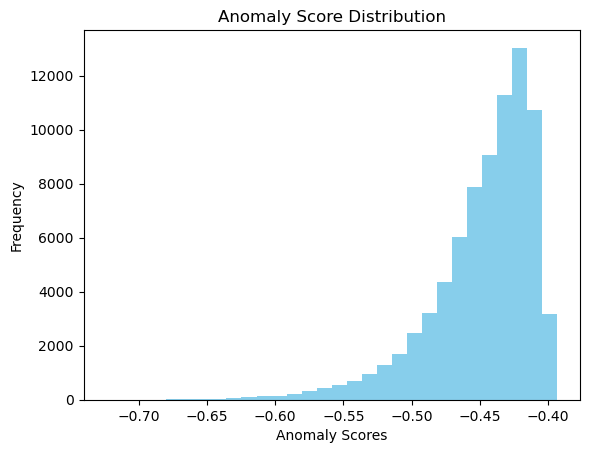

In [ ]:
import optuna
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_samples = trial.suggest_float('max_samples', 0.5, 1.0)
    contamination = trial.suggest_float('contamination', 0.01, 0.3)
    max_features = trial.suggest_float('max_features', 0.5, 1.0)
    
    # Initialize IsolationForest with suggested parameters
    model = IsolationForest(
        n_estimators=n_estimators,
        max_samples=max_samples,
        contamination=contamination,
        max_features=max_features,
        random_state=42
    )
    
    model.fit(X_train)
    score = model.score_samples(X_train)
    return np.nanmean(score) if np.isnan(score).any() else np.mean(score)

# Create Optuna study and optimize
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best Parameters (Optuna):", study.best_params)
best_model_optuna = IsolationForest(**study.best_params, random_state=42)
best_model_optuna.fit(X_train)

# Calculate anomaly ratio
y_pred_optuna = best_model_optuna.predict(X_train)
anomaly_ratio_optuna = np.mean(y_pred_optuna == -1) * 100
print(f"Anomaly Ratio (Optuna): {anomaly_ratio_optuna:.2f}%")

# Visualization
visualize_results(best_model_optuna, X_train)


In [ ]:
best_params_summary = {
    "GridSearchCV": {'contamination': 0.01, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100},
    "RandomizedSearchCV": {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0, 'contamination': 0.44555555555555554},
    "BayesSearchCV": {'contamination': 0.2594484207919251, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 81},
    "Optuna": {'n_estimators': 134, 'max_samples': 0.9295077888654506, 'contamination': 0.1165823963633753, 'max_features': 0.8959674622137497}
}

display("Updated Best Parameters Summary:")
for method, params in best_params_summary.items():
    display(f"{method}: {params}")

best_models = {
    "GridSearchCV": IsolationForest(**best_params_summary["GridSearchCV"], random_state=42),
    "RandomizedSearchCV": IsolationForest(**best_params_summary["RandomizedSearchCV"], random_state=42),
    "BayesSearchCV": IsolationForest(**best_params_summary["BayesSearchCV"], random_state=42),
    "Optuna": IsolationForest(**best_params_summary["Optuna"], random_state=42)
}

for method, model in best_models.items():
    model.fit(X_train)


'Updated Best Parameters Summary:'

"GridSearchCV: {'contamination': 0.01, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}"

"RandomizedSearchCV: {'n_estimators': 100, 'max_samples': 1.0, 'max_features': 1.0, 'contamination': 0.44555555555555554}"

"BayesSearchCV: {'contamination': 0.2594484207919251, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 81}"

"Optuna: {'n_estimators': 134, 'max_samples': 0.9295077888654506, 'contamination': 0.1165823963633753, 'max_features': 0.8959674622137497}"

In [ ]:
# Calculate anomaly ratios for each model
anomaly_ratios = {}
for method, model in best_models.items():
    y_pred = model.predict(X_train)
    anomaly_ratios[method] = np.mean(y_pred == -1) * 100
    display(f"Anomaly Ratio ({method}): {anomaly_ratios[method]:.2f}%")

'Anomaly Ratio (GridSearchCV): 1.00%'

'Anomaly Ratio (RandomizedSearchCV): 44.56%'

'Anomaly Ratio (BayesSearchCV): 25.94%'

'Anomaly Ratio (Optuna): 11.65%'

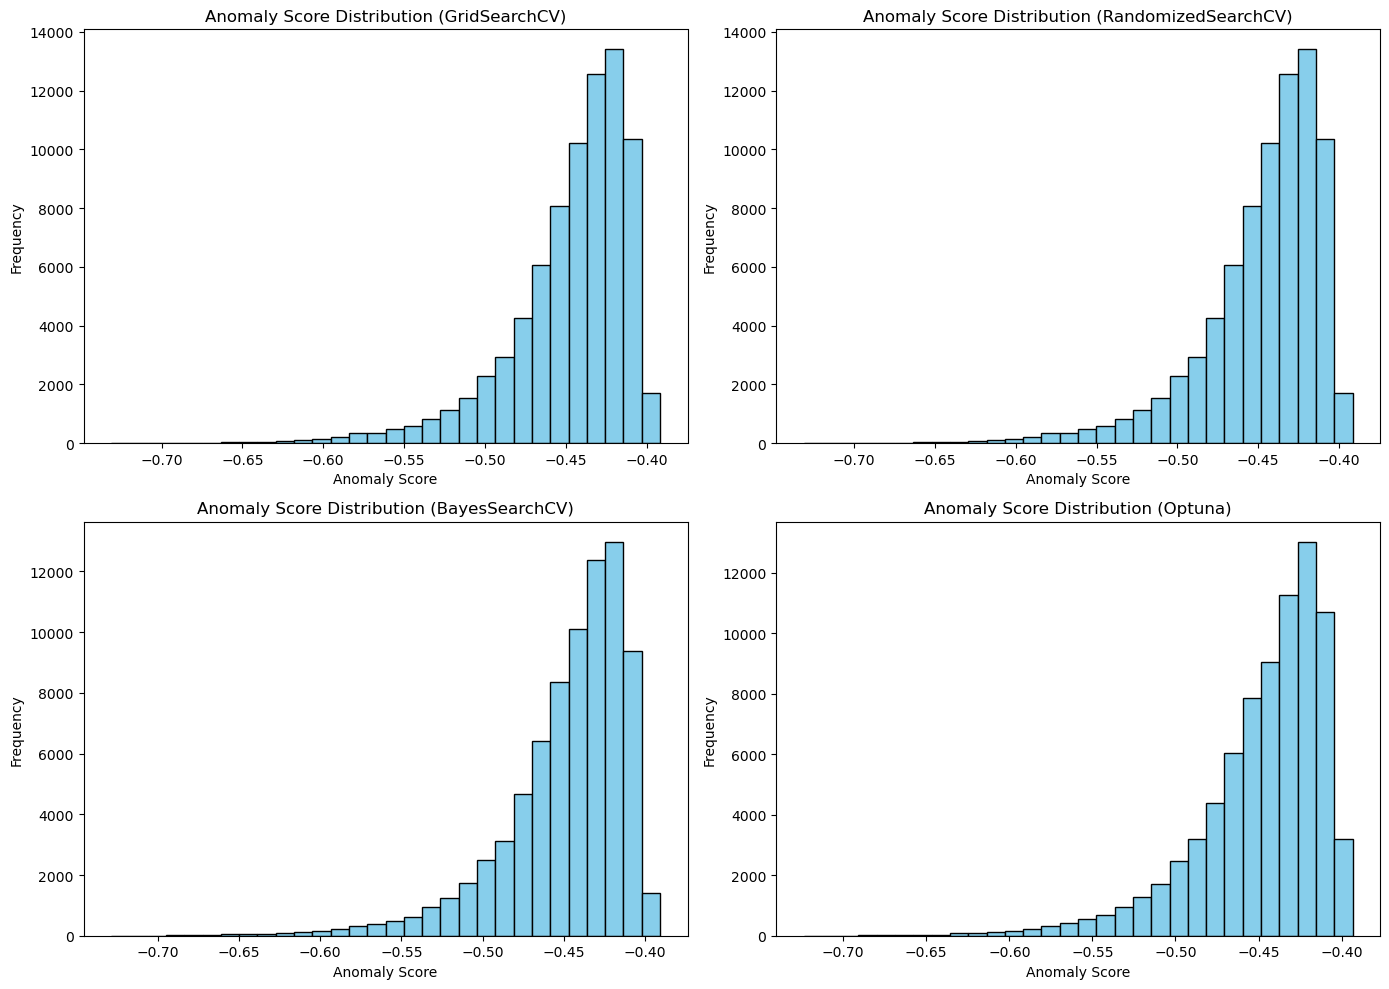

In [ ]:
import matplotlib.pyplot as plt

# Plotted comparison of anomaly score distribution for 4 methods
plt.figure(figsize=(14, 10))
for i, (method, model) in enumerate(best_models.items(), 1):
    plt.subplot(2, 2, i)
    scores = model.score_samples(X_train)
    plt.hist(scores, bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Anomaly Score Distribution ({method})")
    plt.xlabel("Anomaly Score")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Epoch 1/100
974/974 [==============================] - 4s 3ms/step - loss: 1.1583 - val_loss: 1.0952
Epoch 2/100
974/974 [==============================] - 2s 3ms/step - loss: 1.0619 - val_loss: 1.0418
Epoch 3/100
974/974 [==============================] - 10s 10ms/step - loss: 1.0282 - val_loss: 1.0216
Epoch 4/100
974/974 [==============================] - 3s 3ms/step - loss: 1.0145 - val_loss: 1.0127
Epoch 5/100
974/974 [==============================] - 3s 3ms/step - loss: 1.0081 - val_loss: 1.0082
Epoch 6/100
974/974 [==============================] - 3s 3ms/step - loss: 1.0047 - val_loss: 1.0057
Epoch 7/100
974/974 [==============================] - 10s 10ms/step - loss: 1.0028 - val_loss: 1.0043
Epoch 8/100
974/974 [==============================] - 3s 3ms/step - loss: 1.0017 - val_loss: 1.0034
Epoch 9/100
974/974 [==============================] - 3s 3ms/step - loss: 1.0010 - val_loss: 1.0029
Epoch 10/100
974/974 [==============================] - 9s 9ms/step - loss: 1.0006 - va

974/974 [==============================] - 7s 7ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 82/100
974/974 [==============================] - 3s 3ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 83/100
974/974 [==============================] - 3s 3ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 84/100
974/974 [==============================] - 11s 11ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 85/100
974/974 [==============================] - 3s 3ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 86/100
974/974 [==============================] - 3s 3ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 87/100
974/974 [==============================] - 3s 3ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 88/100
974/974 [==============================] - 11s 11ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 89/100
974/974 [==============================] - 3s 3ms/step - loss: 0.9996 - val_loss: 1.0017
Epoch 90/100
974/974 [==============================] - 2s 3ms/step - loss: 0.9996 - val_lo

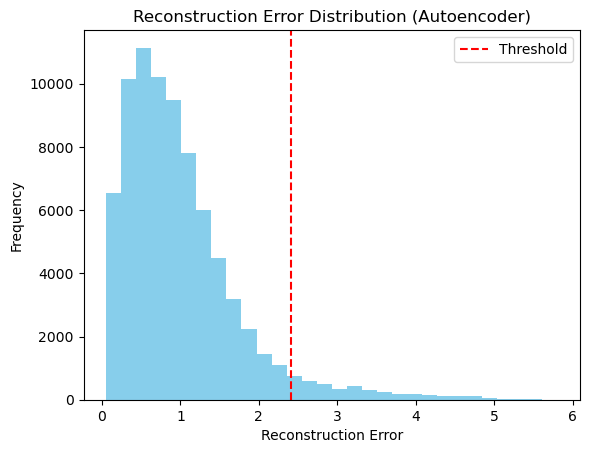

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the autoencoder structure
input_dim = X_train_scaled.shape[1]
encoding_dim = int(input_dim / 2)

# Input layer
input_layer = Input(shape=(input_dim,))
# Encoder layers
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
# Decoder layers
decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

history = autoencoder.fit(
    X_train_scaled, X_train_scaled,
    epochs=100,
    batch_size=64,
    shuffle=True,
    validation_split=0.2
)
X_train_pred = autoencoder.predict(X_train_scaled)
reconstruction_error = np.mean(np.square(X_train_scaled - X_train_pred), axis=1)

threshold = np.percentile(reconstruction_error, 95) 
print(f"Reconstruction error threshold: {threshold}")

y_pred_ae = reconstruction_error > threshold
anomaly_ratio_ae = np.mean(y_pred_ae) * 100
print(f"Anomaly Ratio (Autoencoder): {anomaly_ratio_ae:.2f}%")

plt.hist(reconstruction_error, bins=30, color='skyblue')
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Autoencoder)")
plt.legend()
plt.show()


,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,UPADHYAYULA,M.D.,1,1,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,MO,US,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.59,305.21,157.26,160.91
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.80,118.83,135.32
2,1306820956,DUROCHER,DPM,0,1,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155.00,64.44,60.60
3,1770523540,FULLARD,MD,0,1,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,81002,"Urinalysis, manual test",N,20,18,20,3.50,5.00,3.43,3.43
4,1073627758,PERROTTI,DO,0,1,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40.00,19.54,19.06


Anomaly Ratio (Isolation Forest - GridSearchCV): 1.00%
Epoch 1/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.8203 - val_loss: 0.6926
Epoch 2/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6810 - val_loss: 0.6684
Epoch 3/100
2434/2434 [==============================] - 11s 5ms/step - loss: 0.6674 - val_loss: 0.6580
Epoch 4/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6578 - val_loss: 0.6510
Epoch 5/100
2434/2434 [==============================] - 9s 4ms/step - loss: 0.6541 - val_loss: 0.6491
Epoch 6/100
2434/2434 [==============================] - 6s 3ms/step - loss: 0.6521 - val_loss: 0.6452
Epoch 7/100
2434/2434 [==============================] - 4s 2ms/step - loss: 0.6471 - val_loss: 0.6407
Epoch 8/100
2434/2434 [==============================] - 12s 5ms/step - loss: 0.6440 - val_loss: 0.6394
Epoch 9/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6424 - val_loss: 0.6373
Epoch 10/100
243

2434/2434 [==============================] - 5s 2ms/step - loss: 0.6312 - val_loss: 0.6268
Epoch 80/100
2434/2434 [==============================] - 11s 4ms/step - loss: 0.6311 - val_loss: 0.6268
Epoch 81/100
2434/2434 [==============================] - 6s 3ms/step - loss: 0.6311 - val_loss: 0.6270
Epoch 82/100
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6311 - val_loss: 0.6269
Epoch 83/100
2434/2434 [==============================] - 10s 4ms/step - loss: 0.6311 - val_loss: 0.6268
Epoch 84/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6311 - val_loss: 0.6268
Epoch 85/100
2434/2434 [==============================] - 13s 5ms/step - loss: 0.6311 - val_loss: 0.6266
Epoch 86/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6310 - val_loss: 0.6266
Epoch 87/100
2434/2434 [==============================] - 12s 5ms/step - loss: 0.6311 - val_loss: 0.6265
Epoch 88/100
2434/2434 [==============================] - 5s 2ms/step - l

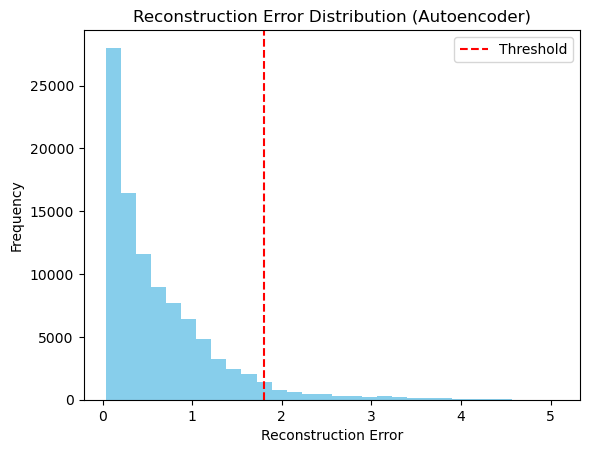

Isolation Forest Anomaly Ratio (GridSearchCV): 1.00%
Autoencoder Anomaly Ratio: 5.00%
Combined Model Anomaly Ratio: 5.27%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

data = pd.read_csv('cleaned_healthcare.csv')
display(data.head())

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)
X = data[numerical_columns]

# Apply Power Transformation and Standardization
power_transformer = PowerTransformer()
X_power_transformed = power_transformer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_power_transformed)

# 1. Isolation Forest with Best Parameters from GridSearchCV
iforest = IsolationForest(
    n_estimators=100,
    max_samples=1.0,
    contamination=0.01,
    max_features=1.0,
    random_state=42
)
iforest.fit(X_scaled)

y_pred_iforest = iforest.predict(X_scaled)
y_pred_iforest = np.where(y_pred_iforest == -1, 1, 0)  # Convert -1 (anomalies) to 1, and 1 (inliers) to 0
anomaly_ratio_iforest = np.mean(y_pred_iforest) * 100
print(f"Anomaly Ratio (Isolation Forest - GridSearchCV): {anomaly_ratio_iforest:.2f}%")

input_dim = X_scaled.shape[1]
encoding_dim = int(input_dim / 2)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

# autoencoder for 100 epochs
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)

# Calculate reconstruction error
X_pred = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - X_pred), axis=1)

# Set a threshold for anomaly detection based on reconstruction error
threshold = np.percentile(reconstruction_error, 95) 
print(f"Reconstruction error threshold (Autoencoder): {threshold}")

y_pred_ae = reconstruction_error > threshold
anomaly_ratio_ae = np.mean(y_pred_ae) * 100
print(f"Anomaly Ratio (Autoencoder): {anomaly_ratio_ae:.2f}%")
combined_anomalies = np.logical_or(y_pred_iforest, y_pred_ae)
combined_anomaly_ratio = np.mean(combined_anomalies) * 100
print(f"Combined Model Anomaly Ratio: {combined_anomaly_ratio:.2f}%")

plt.hist(reconstruction_error, bins=30, color='skyblue')
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Autoencoder)")
plt.legend()
plt.show()

print(f"Isolation Forest Anomaly Ratio (GridSearchCV): {anomaly_ratio_iforest:.2f}%")
print(f"Autoencoder Anomaly Ratio: {anomaly_ratio_ae:.2f}%")
print(f"Combined Model Anomaly Ratio: {combined_anomaly_ratio:.2f}%")


,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,UPADHYAYULA,M.D.,1,1,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,MO,US,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.59,305.21,157.26,160.91
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.80,118.83,135.32
2,1306820956,DUROCHER,DPM,0,1,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155.00,64.44,60.60
3,1770523540,FULLARD,MD,0,1,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,81002,"Urinalysis, manual test",N,20,18,20,3.50,5.00,3.43,3.43
4,1073627758,PERROTTI,DO,0,1,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40.00,19.54,19.06


Anomaly Ratio (Isolation Forest): 11.66%
Epoch 1/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.9032 - val_loss: 0.8254
Epoch 2/100
2434/2434 [==============================] - 6s 2ms/step - loss: 0.8044 - val_loss: 0.7897
Epoch 3/100
2434/2434 [==============================] - 8s 3ms/step - loss: 0.7878 - val_loss: 0.7827
Epoch 4/100
2434/2434 [==============================] - 12s 5ms/step - loss: 0.7835 - val_loss: 0.7795
Epoch 5/100
2434/2434 [==============================] - 14s 6ms/step - loss: 0.7809 - val_loss: 0.7775
Epoch 6/100
2434/2434 [==============================] - 6s 2ms/step - loss: 0.7785 - val_loss: 0.7756
Epoch 7/100
2434/2434 [==============================] - 12s 5ms/step - loss: 0.7766 - val_loss: 0.7735
Epoch 8/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7755 - val_loss: 0.7728
Epoch 9/100
2434/2434 [==============================] - 13s 6ms/step - loss: 0.7748 - val_loss: 0.7726
Epoch 10/100
2434/2434 [====

2434/2434 [==============================] - 14s 6ms/step - loss: 0.7747 - val_loss: 0.7736
Epoch 80/100
2434/2434 [==============================] - 8s 3ms/step - loss: 0.7737 - val_loss: 0.7714
Epoch 81/100
2434/2434 [==============================] - 9s 4ms/step - loss: 0.7736 - val_loss: 0.7715
Epoch 82/100
2434/2434 [==============================] - 8s 3ms/step - loss: 0.7745 - val_loss: 0.7767
Epoch 83/100
2434/2434 [==============================] - 9s 4ms/step - loss: 0.7788 - val_loss: 0.7774
Epoch 84/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7813 - val_loss: 0.7798
Epoch 85/100
2434/2434 [==============================] - 12s 5ms/step - loss: 0.7788 - val_loss: 0.7750
Epoch 86/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7760 - val_loss: 0.7743
Epoch 87/100
2434/2434 [==============================] - 12s 5ms/step - loss: 0.7770 - val_loss: 0.7770
Epoch 88/100
2434/2434 [==============================] - 5s 2ms/step - lo

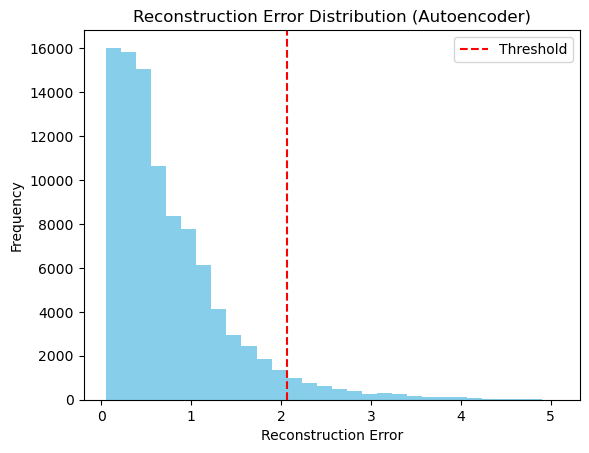

Isolation Forest Anomaly Ratio: 11.66%
Autoencoder Anomaly Ratio: 5.00%
Combined Model Anomaly Ratio: 12.53%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

data = pd.read_csv('cleaned_healthcare.csv')
display(data.head())
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)
X = data[numerical_columns]

# Apply Power Transformation and Standardization
power_transformer = PowerTransformer()
X_power_transformed = power_transformer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_power_transformed)

# 1. Isolation Forest with Optuna-Tuned Parameters
iforest = IsolationForest(
    n_estimators=134,
    max_samples=0.9295077888654506,
    contamination=0.1165823963633753,
    max_features=0.8959674622137497,
    random_state=42
)
iforest.fit(X_scaled)
y_pred_iforest = iforest.predict(X_scaled)
y_pred_iforest = np.where(y_pred_iforest == -1, 1, 0)
anomaly_ratio_iforest = np.mean(y_pred_iforest) * 100
print(f"Anomaly Ratio (Isolation Forest): {anomaly_ratio_iforest:.2f}%")

input_dim = X_scaled.shape[1]
encoding_dim = int(input_dim / 2)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

# Train the autoencoder
history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=100,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)

X_pred = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - X_pred), axis=1)

threshold = np.percentile(reconstruction_error, 95)  # 95th percentile threshold
print(f"Reconstruction error threshold (Autoencoder): {threshold}")

y_pred_ae = reconstruction_error > threshold
anomaly_ratio_ae = np.mean(y_pred_ae) * 100
print(f"Anomaly Ratio (Autoencoder): {anomaly_ratio_ae:.2f}%")

combined_anomalies = np.logical_or(y_pred_iforest, y_pred_ae)
combined_anomaly_ratio = np.mean(combined_anomalies) * 100
print(f"Combined Anomaly Ratio: {combined_anomaly_ratio:.2f}%")

plt.hist(reconstruction_error, bins=30, color='skyblue')
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Autoencoder)")
plt.legend()
plt.show()

print(f"Isolation Forest Anomaly Ratio: {anomaly_ratio_iforest:.2f}%")
print(f"Autoencoder Anomaly Ratio: {anomaly_ratio_ae:.2f}%")
print(f"Combined Model Anomaly Ratio: {combined_anomaly_ratio:.2f}%")

,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,UPADHYAYULA,M.D.,1,1,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,MO,US,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.59,305.21,157.26,160.91
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.80,118.83,135.32
2,1306820956,DUROCHER,DPM,0,1,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155.00,64.44,60.60
3,1770523540,FULLARD,MD,0,1,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,81002,"Urinalysis, manual test",N,20,18,20,3.50,5.00,3.43,3.43
4,1073627758,PERROTTI,DO,0,1,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40.00,19.54,19.06


Anomaly Ratio (One-Class SVM): 5.00%
Epoch 1/50
2434/2434 [==============================] - 6s 2ms/step - loss: 0.8926 - val_loss: 0.7310
Epoch 2/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7048 - val_loss: 0.6794
Epoch 3/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6705 - val_loss: 0.6573
Epoch 4/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6555 - val_loss: 0.6472
Epoch 5/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6478 - val_loss: 0.6418
Epoch 6/50
2434/2434 [==============================] - 13s 5ms/step - loss: 0.6435 - val_loss: 0.6387
Epoch 7/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6410 - val_loss: 0.6371
Epoch 8/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.6396 - val_loss: 0.6359
Epoch 9/50
2434/2434 [==============================] - 12s 5ms/step - loss: 0.6386 - val_loss: 0.6351
Epoch 10/50
2434/2434 [====================

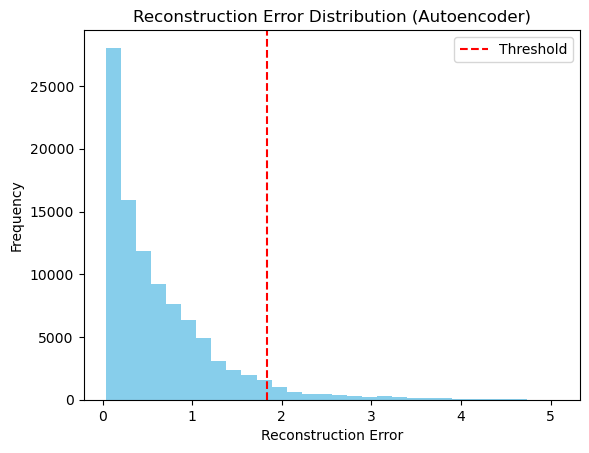

One-Class SVM Anomaly Ratio: 5.00%
Autoencoder Anomaly Ratio: 5.00%
Combined Model Anomaly Ratio: 6.72%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import PowerTransformer, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

data = pd.read_csv('cleaned_healthcare.csv')
display(data.head())
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)
X = data[numerical_columns]

# Apply Power Transformation and Standardization
power_transformer = PowerTransformer()
X_power_transformed = power_transformer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_power_transformed)

# 1. One-Class SVM with Tuned Parameters (example values; you may want to tune these using Optuna)
one_class_svm = OneClassSVM(
    kernel='rbf',  
    gamma=0.01,   
    nu=0.05       
)
one_class_svm.fit(X_scaled)
y_pred_svm = one_class_svm.predict(X_scaled)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

anomaly_ratio_svm = np.mean(y_pred_svm) * 100
print(f"Anomaly Ratio (One-Class SVM): {anomaly_ratio_svm:.2f}%")

input_dim = X_scaled.shape[1]
encoding_dim = int(input_dim / 2)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=50,
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)
X_pred = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - X_pred), axis=1)

threshold = np.percentile(reconstruction_error, 95)  
print(f"Reconstruction error threshold (Autoencoder): {threshold}")

y_pred_ae = reconstruction_error > threshold
anomaly_ratio_ae = np.mean(y_pred_ae) * 100
print(f"Anomaly Ratio (Autoencoder): {anomaly_ratio_ae:.2f}%")

combined_anomalies = np.logical_or(y_pred_svm, y_pred_ae)
combined_anomaly_ratio = np.mean(combined_anomalies) * 100
print(f"Combined Anomaly Ratio: {combined_anomaly_ratio:.2f}%")

plt.hist(reconstruction_error, bins=30, color='skyblue')
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Autoencoder)")
plt.legend()
plt.show()

print(f"One-Class SVM Anomaly Ratio: {anomaly_ratio_svm:.2f}%")
print(f"Autoencoder Anomaly Ratio: {anomaly_ratio_ae:.2f}%")
print(f"Combined Model Anomaly Ratio: {combined_anomaly_ratio:.2f}%")


,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,UPADHYAYULA,M.D.,1,1,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,MO,US,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.59,305.21,157.26,160.91
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.80,118.83,135.32
2,1306820956,DUROCHER,DPM,0,1,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155.00,64.44,60.60
3,1770523540,FULLARD,MD,0,1,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,81002,"Urinalysis, manual test",N,20,18,20,3.50,5.00,3.43,3.43
4,1073627758,PERROTTI,DO,0,1,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40.00,19.54,19.06


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Best Parameters (GridSearchCV - One-Class SVM): {'gamma': 'scale', 'kernel': 'rbf', 'nu': 0.01}
Anomaly Ratio (One-Class SVM - GridSearchCV): 1.02%
Epoch 1/100
2434/2434 [==============================] - 6s 2ms/step - loss: 0.9069 - val_loss: 0.8194
Epoch 2/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.8021 - val_loss: 0.7874
Epoch 3/100
2434/2434 [==============================] - 6s 3ms/step - loss: 0.7858 - val_loss: 0.7806
Epoch 4/100
2434/2434 [==============================] - 6s 2ms/step - loss: 0.7815 - val_loss: 0.7774
Epoch 5/100
2434/2434 [==============================] - 6s 2ms/step - loss: 0.7792 - val_loss: 0.7758
Epoch 6/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7779 - val_loss: 0.7747
Epoch 7/100
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7769 - val_loss: 0.7737
Epoch 8/100
2434/2434 [==============================] - 6s 2ms/step - loss: 0.7761 - val_loss: 0.7726
Epoch 9/100
2434/2434 [=====

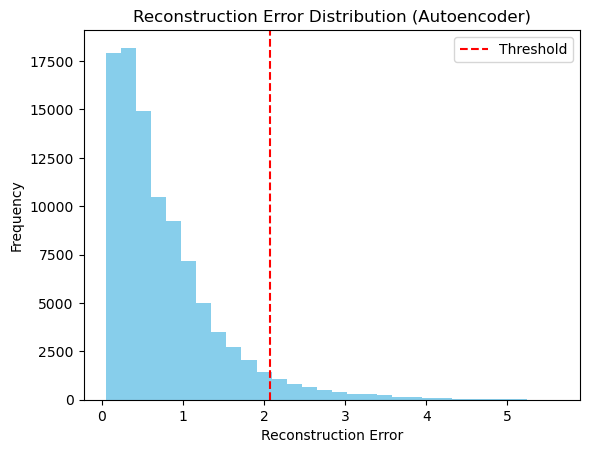

One-Class SVM Anomaly Ratio (GridSearchCV): 1.02%
Autoencoder Anomaly Ratio: 5.00%
Combined Model Anomaly Ratio: 5.45%


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

data = pd.read_csv('cleaned_healthcare.csv')
display(data.head())
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)
X = data[numerical_columns]
power_transformer = PowerTransformer()
X_power_transformed = power_transformer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_power_transformed)


svm_params = {
    'nu': [0.01, 0.05, 0.1, 0.2], 
    'gamma': ['scale', 0.01, 0.1, 1, 10],
    'kernel': ['rbf']
}

one_class_svm = OneClassSVM()
grid_search_svm = GridSearchCV(one_class_svm, svm_params, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_scaled)

best_svm = grid_search_svm.best_estimator_
print("Best Parameters (GridSearchCV - One-Class SVM):", grid_search_svm.best_params_)

y_pred_svm = best_svm.fit_predict(X_scaled)
y_pred_svm = np.where(y_pred_svm == -1, 1, 0)

anomaly_ratio_svm = np.mean(y_pred_svm) * 100
print(f"Anomaly Ratio (One-Class SVM - GridSearchCV): {anomaly_ratio_svm:.2f}%")

input_dim = X_scaled.shape[1]
encoding_dim = int(input_dim / 2)

input_layer = Input(shape=(input_dim,))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer="adam", loss="mse")

history = autoencoder.fit(
    X_scaled, X_scaled,
    epochs=100,  
    batch_size=32,
    shuffle=True,
    validation_split=0.2
)
X_pred = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - X_pred), axis=1)

threshold = np.percentile(reconstruction_error, 95)  
print(f"Reconstruction error threshold (Autoencoder): {threshold}")

y_pred_ae = reconstruction_error > threshold
anomaly_ratio_ae = np.mean(y_pred_ae) * 100
print(f"Anomaly Ratio (Autoencoder): {anomaly_ratio_ae:.2f}%")

combined_anomalies = np.logical_or(y_pred_svm, y_pred_ae)
combined_anomaly_ratio = np.mean(combined_anomalies) * 100
print(f"Combined Anomaly Ratio: {combined_anomaly_ratio:.2f}%")

plt.hist(reconstruction_error, bins=30, color='skyblue')
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Autoencoder)")
plt.legend()
plt.show()

print(f"One-Class SVM Anomaly Ratio (GridSearchCV): {anomaly_ratio_svm:.2f}%")
print(f"Autoencoder Anomaly Ratio: {anomaly_ratio_ae:.2f}%")
print(f"Combined Model Anomaly Ratio: {combined_anomaly_ratio:.2f}%")


,National Provider Identifier,Last Name/Organization Name of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,...,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,1891106191,UPADHYAYULA,M.D.,1,1,1402 S GRAND BLVD,SAINT LOUIS,631041004.0,MO,US,...,99223,"Initial hospital inpatient care, typically 70 ...",N,27,24,27,200.59,305.21,157.26,160.91
1,1346202256,JONES,M.D.,1,1,2950 VILLAGE DR,FAYETTEVILLE,283043815.0,NC,US,...,G0202,"Screening mammography, bilateral (2-view study...",N,175,175,175,123.73,548.80,118.83,135.32
2,1306820956,DUROCHER,DPM,0,1,20 WASHINGTON AVE,NORTH HAVEN,64732343.0,CT,US,...,99348,"Established patient home visit, typically 25 m...",N,32,13,32,90.65,155.00,64.44,60.60
3,1770523540,FULLARD,MD,0,1,5746 N BROADWAY ST,KANSAS CITY,641183998.0,MO,US,...,81002,"Urinalysis, manual test",N,20,18,20,3.50,5.00,3.43,3.43
4,1073627758,PERROTTI,DO,0,1,875 MILITARY TRL,JUPITER,334585700.0,FL,US,...,96372,Injection beneath the skin or into muscle for ...,N,33,24,31,26.52,40.00,19.54,19.06


Epoch 1/50
2434/2434 [==============================] - 6s 2ms/step - loss: 0.9197 - val_loss: 0.8303
Epoch 2/50
2434/2434 [==============================] - 12s 5ms/step - loss: 0.8069 - val_loss: 0.7892
Epoch 3/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7861 - val_loss: 0.7801
Epoch 4/50
2434/2434 [==============================] - 13s 5ms/step - loss: 0.7805 - val_loss: 0.7759
Epoch 5/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7767 - val_loss: 0.7727
Epoch 6/50
2434/2434 [==============================] - 13s 5ms/step - loss: 0.7736 - val_loss: 0.7699
Epoch 7/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7715 - val_loss: 0.7680
Epoch 8/50
2434/2434 [==============================] - 13s 5ms/step - loss: 0.7697 - val_loss: 0.7667
Epoch 9/50
2434/2434 [==============================] - 5s 2ms/step - loss: 0.7684 - val_loss: 0.7655
Epoch 10/50
2434/2434 [==============================] - 13s 5ms/step - loss: 

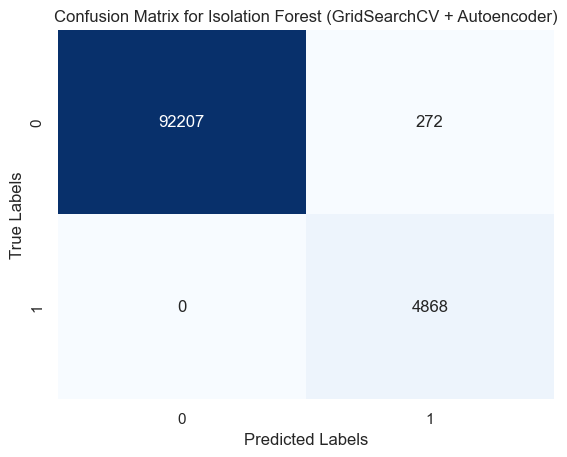

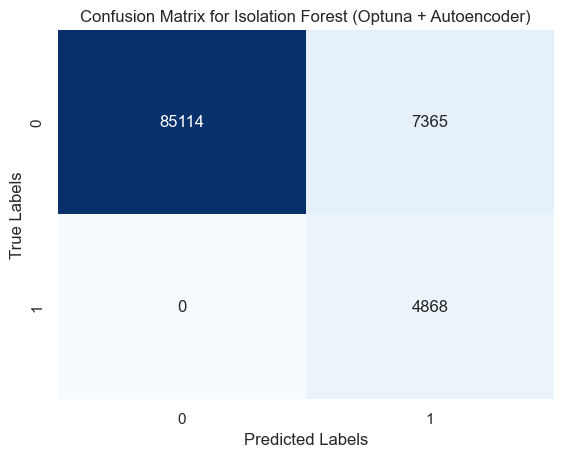

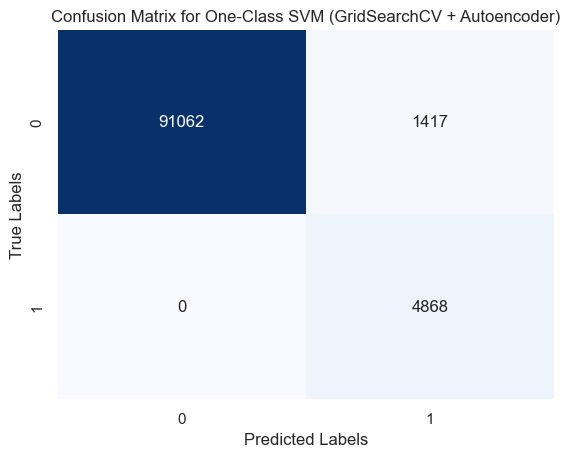

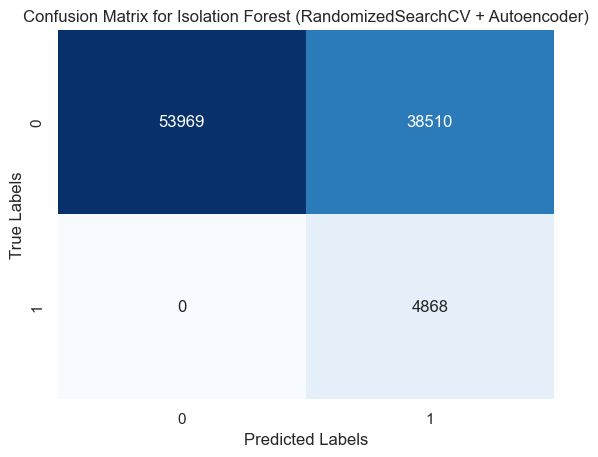

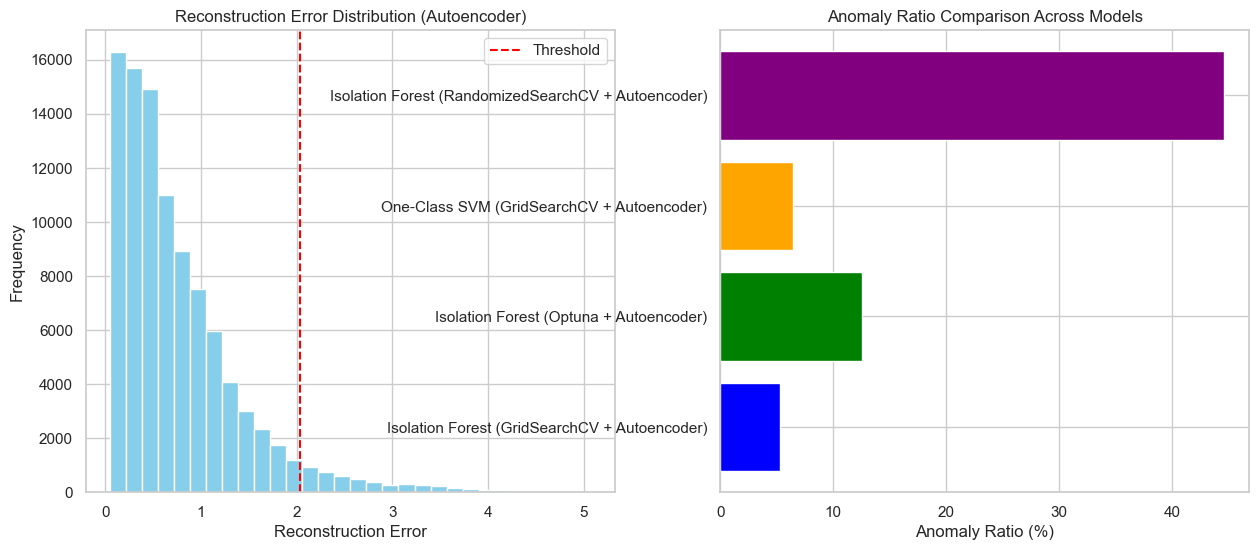

Isolation Forest (GridSearchCV + Autoencoder) - Precision: 0.95, Recall: 1.00, F1-Score: 0.97
Isolation Forest (Optuna + Autoencoder) - Precision: 0.40, Recall: 1.00, F1-Score: 0.57
One-Class SVM (GridSearchCV + Autoencoder) - Precision: 0.77, Recall: 1.00, F1-Score: 0.87
Isolation Forest (RandomizedSearchCV + Autoencoder) - Precision: 0.11, Recall: 1.00, F1-Score: 0.20


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf

data = pd.read_csv('cleaned_healthcare.csv')
display(data.head())

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)

X = data[numerical_columns]
power_transformer = PowerTransformer()
X_power_transformed = power_transformer.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_power_transformed)

def build_autoencoder(input_dim):
    encoding_dim = int(input_dim / 2)
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
    decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
    decoder = Dense(input_dim, activation="sigmoid")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer="adam", loss="mse")
    history = autoencoder.fit(
        X_scaled, X_scaled,
        epochs=50,
        batch_size=32,
        shuffle=True,
        validation_split=0.2
    )

    X_pred = autoencoder.predict(X_scaled)
    reconstruction_error = np.mean(np.square(X_scaled - X_pred), axis=1)

    threshold = np.percentile(reconstruction_error, 95)
    return reconstruction_error, threshold

input_dim = X_scaled.shape[1]
reconstruction_error, threshold = build_autoencoder(input_dim)
y_pred_ae = reconstruction_error > threshold

# 1. Isolation Forest (GridSearchCV)
iforest_grid = IsolationForest(n_estimators=100, max_samples=1.0, contamination=0.01, max_features=1.0, random_state=42)
iforest_grid.fit(X_scaled)
y_pred_iforest_grid = iforest_grid.predict(X_scaled) == -1

# 2. Isolation Forest (Optuna)
iforest_optuna = IsolationForest(
    n_estimators=134, max_samples=0.9295077888654506, contamination=0.1165823963633753,
    max_features=0.8959674622137497, random_state=42
)
iforest_optuna.fit(X_scaled)
y_pred_iforest_optuna = iforest_optuna.predict(X_scaled) == -1

# 3. One-Class SVM (GridSearchCV)
one_class_svm = OneClassSVM(kernel='rbf', gamma=0.01, nu=0.05)
one_class_svm.fit(X_scaled)
y_pred_svm = one_class_svm.predict(X_scaled) == -1

# 4. Isolation Forest (RandomizedSearchCV) - Best Parameters
iforest_random = IsolationForest(
    n_estimators=100, max_samples=1.0, max_features=1.0, contamination=0.4456, random_state=42
)
iforest_random.fit(X_scaled)
y_pred_iforest_random = iforest_random.predict(X_scaled) == -1

combined_iforest_grid = np.logical_or(y_pred_iforest_grid, y_pred_ae)
combined_iforest_optuna = np.logical_or(y_pred_iforest_optuna, y_pred_ae)
combined_svm = np.logical_or(y_pred_svm, y_pred_ae)
combined_iforest_random = np.logical_or(y_pred_iforest_random, y_pred_ae)

def calculate_metrics(y_true, y_pred, model_name):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"{model_name} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    return precision, recall, f1
y_true = y_pred_ae  

metrics = {
    "Isolation Forest (GridSearchCV + Autoencoder)": calculate_metrics(y_true, combined_iforest_grid, "Isolation Forest (GridSearchCV + Autoencoder)"),
    "Isolation Forest (Optuna + Autoencoder)": calculate_metrics(y_true, combined_iforest_optuna, "Isolation Forest (Optuna + Autoencoder)"),
    "One-Class SVM (GridSearchCV + Autoencoder)": calculate_metrics(y_true, combined_svm, "One-Class SVM (GridSearchCV + Autoencoder)"),
    "Isolation Forest (RandomizedSearchCV + Autoencoder)": calculate_metrics(y_true, combined_iforest_random, "Isolation Forest (RandomizedSearchCV + Autoencoder)")
}

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {title}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

plot_confusion_matrix(y_true, combined_iforest_grid, "Isolation Forest (GridSearchCV + Autoencoder)")
plot_confusion_matrix(y_true, combined_iforest_optuna, "Isolation Forest (Optuna + Autoencoder)")
plot_confusion_matrix(y_true, combined_svm, "One-Class SVM (GridSearchCV + Autoencoder)")
plot_confusion_matrix(y_true, combined_iforest_random, "Isolation Forest (RandomizedSearchCV + Autoencoder)")

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.hist(reconstruction_error, bins=30, color='skyblue')
plt.axvline(threshold, color="red", linestyle="--", label="Threshold")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.title("Reconstruction Error Distribution (Autoencoder)")
plt.legend()

model_labels = [
    "Isolation Forest (GridSearchCV + Autoencoder)",
    "Isolation Forest (Optuna + Autoencoder)",
    "One-Class SVM (GridSearchCV + Autoencoder)",
    "Isolation Forest (RandomizedSearchCV + Autoencoder)"
]
anomaly_ratios = [
    np.mean(combined_iforest_grid) * 100,
    np.mean(combined_iforest_optuna) * 100,
    np.mean(combined_svm) * 100,
    np.mean(combined_iforest_random) * 100
]

plt.subplot(1, 2, 2)
plt.barh(model_labels, anomaly_ratios, color=["blue", "green", "orange", "purple"])
plt.xlabel("Anomaly Ratio (%)")
plt.title("Anomaly Ratio Comparison Across Models")
plt.show()

for model_name, metric in metrics.items():
    print(f"{model_name} - Precision: {metric[0]:.2f}, Recall: {metric[1]:.2f}, F1-Score: {metric[2]:.2f}")


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import tensorflow as tf
data = pd.read_csv('cleaned_healthcare.csv')

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)

X = data[numerical_columns]

power_transformer = PowerTransformer()
X_power_transformed = power_transformer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_power_transformed)

def build_autoencoder(input_dim):
    encoding_dim = int(input_dim / 2)
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu")(input_layer)
    encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
    decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
    decoder = Dense(input_dim, activation="sigmoid")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer="adam", loss="mse")
    autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

    return autoencoder

input_dim = X_scaled.shape[1]
autoencoder = build_autoencoder(input_dim)
X_pred = autoencoder.predict(X_scaled)
reconstruction_error = np.mean(np.square(X_scaled - X_pred), axis=1)
threshold = np.percentile(reconstruction_error, 95)
y_pred_ae = reconstruction_error > threshold
iforest = IsolationForest(
    n_estimators=100, 
    max_samples=1.0, 
    contamination=0.01, 
    max_features=1.0, 
    random_state=42
)
iforest.fit(X_scaled)
y_pred_iforest = iforest.predict(X_scaled) == -1
combined_predictions = np.logical_or(y_pred_ae, y_pred_iforest)

pipeline = {
    "power_transformer": power_transformer,
    "scaler": scaler,
    "iforest": iforest
}
joblib.dump(pipeline, 'iforest_pipeline.pkl')
autoencoder.save('autoencoder_model.h5')
combined_results = pd.DataFrame({
    'Reconstruction_Error': reconstruction_error,
    'Autoencoder_Anomaly': y_pred_ae,
    'IsolationForest_Anomaly': y_pred_iforest,
    'Combined_Anomaly': combined_predictions
})
combined_results.to_csv('combined_anomaly_results.csv', index=False)

print("Models and pipeline saved successfully!")


Epoch 1/50
2434/2434 [==============================] - 15s 6ms/step - loss: 0.7803 - val_loss: 0.6826
Epoch 2/50
2434/2434 [==============================] - 6s 2ms/step - loss: 0.6760 - val_loss: 0.6645
Epoch 3/50
2434/2434 [==============================] - 14s 6ms/step - loss: 0.6624 - val_loss: 0.6527
Epoch 4/50
2434/2434 [==============================] - 14s 6ms/step - loss: 0.6545 - val_loss: 0.6484
Epoch 5/50
2434/2434 [==============================] - 6s 3ms/step - loss: 0.6516 - val_loss: 0.6464
Epoch 6/50
2434/2434 [==============================] - 14s 6ms/step - loss: 0.6503 - val_loss: 0.6454
Epoch 7/50
2434/2434 [==============================] - 15s 6ms/step - loss: 0.6495 - val_loss: 0.6448
Epoch 8/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6491 - val_loss: 0.6444
Epoch 9/50
2434/2434 [==============================] - 15s 6ms/step - loss: 0.6488 - val_loss: 0.6442
Epoch 10/50
2434/2434 [==============================] - 13s 5ms/step - loss

In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
data = pd.read_csv('cleaned_healthcare.csv')

numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)
X = data[numerical_columns]
power_transformer = PowerTransformer()
X_power_transformed = power_transformer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_power_transformed)
joblib.dump(power_transformer, 'power_transformer.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("PowerTransformer and StandardScaler models saved.")

PowerTransformer and StandardScaler models saved.


In [ ]:
import numpy as np
import pandas as pd
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer, StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import tensorflow as tf
data = pd.read_csv('cleaned_healthcare.csv')
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)
X = data[numerical_columns]
power_transformer = PowerTransformer()
X_scaled = power_transformer.fit_transform(X)
joblib.dump(power_transformer, 'power_transformer.pkl')
print("PowerTransformer models saved.")

# def build_autoencoder(input_dim):
#     encoding_dim = int(input_dim / 2)
#     input_layer = Input(shape=(input_dim,))
#     encoder = Dense(encoding_dim, activation="relu")(input_layer)
#     encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
#     decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
#     decoder = Dense(input_dim, activation="sigmoid")(decoder)

#     autoencoder = Model(inputs=input_layer, outputs=decoder)
#     autoencoder.compile(optimizer=Adam(), loss="mse")
#     return autoencoder

# input_dim = X_scaled.shape[1]
# autoencoder = build_autoencoder(input_dim)
# autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)
# autoencoder.save('autoencoder_model.h5')
# print("Autoencoder model saved.")


def build_autoencoder(input_dim, l2_lambda=0.001):
    encoding_dim = int(input_dim / 2)
    input_layer = Input(shape=(input_dim,))
    
    encoder = Dense(encoding_dim, activation="relu", kernel_regularizer=l2(l2_lambda))(input_layer)
    encoder = Dense(int(encoding_dim / 2), activation="relu", kernel_regularizer=l2(l2_lambda))(encoder)
    
    decoder = Dense(int(encoding_dim / 2), activation="relu", kernel_regularizer=l2(l2_lambda))(encoder)
    decoder = Dense(input_dim, activation="sigmoid")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer=Adam(), loss="mse")
    return autoencoder

input_dim = X_scaled.shape[1]
autoencoder = build_autoencoder(input_dim)
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2)
autoencoder.save('autoencoder_model.h5')
print("Autoencoder model with L2 regularization saved.")

iforest_grid = IsolationForest(n_estimators=100, max_samples=1.0, contamination=0.01, max_features=1.0, random_state=42)
iforest_grid.fit(X_scaled)

iforest_pipeline = {
    'iforest_model': iforest_grid,
    'power_transformer': power_transformer,
}
joblib.dump(iforest_pipeline, 'iforest_pipeline.pkl')
print("Isolation Forest model and pipeline saved.")


PowerTransformer models saved.
Epoch 1/50
2434/2434 [==============================] - 9s 4ms/step - loss: 0.9160 - val_loss: 0.8408
Epoch 2/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.8228 - val_loss: 0.8012
Epoch 3/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.7126 - val_loss: 0.6793
Epoch 4/50
2434/2434 [==============================] - 8s 3ms/step - loss: 0.6800 - val_loss: 0.6730
Epoch 5/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6760 - val_loss: 0.6703
Epoch 6/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6740 - val_loss: 0.6687
Epoch 7/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6725 - val_loss: 0.6672
Epoch 8/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6695 - val_loss: 0.6623
Epoch 9/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6654 - val_loss: 0.6603
Epoch 10/50
2434/2434 [============================

In [ ]:
import pandas as pd
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
data = pd.read_csv('cleaned_healthcare.csv')
numerical_columns = [
    'Number of Services',
    'Number of Medicare Beneficiaries',
    'Number of Distinct Medicare Beneficiary/Per Day Services',
    'Average Medicare Allowed Amount',
    'Average Submitted Charge Amount',
    'Average Medicare Payment Amount',
    'Average Medicare Standardized Amount',
    'Gender of the Provider'
]
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(subset=numerical_columns)
X = data[numerical_columns]
power_transformer = PowerTransformer()
X_scaled = power_transformer.fit_transform(X)

joblib.dump(power_transformer, 'power_transformer.pkl')
print("PowerTransformer model saved.")

def build_autoencoder(input_dim, l2_lambda=0.001):
    encoding_dim = int(input_dim / 2)
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(encoding_dim, activation="relu", kernel_regularizer=l2(l2_lambda))(input_layer)
    encoder = Dense(int(encoding_dim / 2), activation="relu", kernel_regularizer=l2(l2_lambda))(encoder)
    decoder = Dense(int(encoding_dim / 2), activation="relu", kernel_regularizer=l2(l2_lambda))(encoder)
    decoder = Dense(input_dim, activation="sigmoid")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    autoencoder.compile(optimizer=Adam(), loss="mse")
    return autoencoder

input_dim = X_scaled.shape[1]
autoencoder = build_autoencoder(input_dim)
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=32, validation_split=0.2)
autoencoder.save('autoencoder_model.keras')
print("Autoencoder model with L2 regularization saved.")

iforest_grid = IsolationForest(n_estimators=100, max_samples=1.0, contamination=0.01, max_features=1.0, random_state=42)
iforest_grid.fit(X_scaled)
iforest_pipeline = {
    'iforest_model': iforest_grid,
    'power_transformer': power_transformer,
}
joblib.dump(iforest_pipeline, 'iforest_pipeline.pkl')
print("Isolation Forest model and pipeline saved.")


PowerTransformer model saved.
Epoch 1/50
2434/2434 [==============================] - 8s 3ms/step - loss: 0.8855 - val_loss: 0.7251
Epoch 2/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.7093 - val_loss: 0.6908
Epoch 3/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6876 - val_loss: 0.6763
Epoch 4/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6765 - val_loss: 0.6682
Epoch 5/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6697 - val_loss: 0.6632
Epoch 6/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6657 - val_loss: 0.6600
Epoch 7/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6632 - val_loss: 0.6581
Epoch 8/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6613 - val_loss: 0.6566
Epoch 9/50
2434/2434 [==============================] - 7s 3ms/step - loss: 0.6600 - val_loss: 0.6553
Epoch 10/50
2434/2434 [=============================

In [4]:
import pandas as pd
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import PowerTransformer
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
j=load_model('autoencoder_model.keras')

In [ ]:
import pandas as pd
import joblib
import numpy as np
iforest_pipeline = joblib.load('iforest_pipeline.pkl')
power_transformer = iforest_pipeline['power_transformer']
iforest_model = iforest_pipeline['iforest_model']
autoencoder = load_model('autoencoder_model.keras')

def preprocess_input(input_data):
    input_df = pd.DataFrame(input_data, columns=[
        'Number of Services',
        'Number of Medicare Beneficiaries',
        'Number of Distinct Medicare Beneficiary/Per Day Services',
        'Average Medicare Allowed Amount',
        'Average Submitted Charge Amount',
        'Average Medicare Payment Amount',
        'Average Medicare Standardized Amount',
        'Gender of the Provider'
    ])
    for col in input_df.columns:
        input_df[col] = pd.to_numeric(input_df[col], errors='coerce')
    input_df = input_df.dropna()
    input_scaled = power_transformer.transform(input_df)
    
    return input_scaled

def predict(input_data):
    input_scaled = preprocess_input(input_data)
    iforest_predictions = iforest_model.predict(input_scaled)
    autoencoder_predictions = autoencoder.predict(input_scaled)
    reconstruction_errors = np.mean(np.square(input_scaled - autoencoder_predictions), axis=1)
    
    return iforest_predictions, reconstruction_errors
custom_input = [
    [73, 68, 73, 15.51, 76, 15.2, 15.2, 1],
    [15, 150, 7, 300, 350, 330, 320, 0]   
]
iforest_preds, reconstruction_errors = predict(custom_input)

for i, (iforest_pred, error) in enumerate(zip(iforest_preds, reconstruction_errors)):
    print(f"Input {i+1}: Isolation Forest Prediction: {iforest_pred}, Reconstruction Error: {error}")


1/1 [==============================] - 0s 239ms/step
Input 1: Isolation Forest Prediction: 1, Reconstruction Error: 0.6436021871009747
Input 2: Isolation Forest Prediction: -1, Reconstruction Error: 1.5698655790024199
